# ¿Qué vende un coche?

Trabajaremos con una base de datos de Crankshaft List, un sitio web en el que se publican cada día cientos de anuncios gratuitos para la venta de vehículos.

El propósito de este proyecto es determinar cuales son los factores que influyen en el precio de un vehículo. Para ello, estudiaremos la data recopilada durante los últimos años que contiene información respecto al precio, años del vehículo fecha de publicación del anuncio, millaje, cilindrada y condición, a fin de determinar la relación (si la hay) entre estas variables y el precio de un auto.

Primero revisaremos la información para depurarla, la ordenaremos y agruparemos según las variables de interés para luego comenzar con el análisis junto con la creación de gráficos para visualizar de mejor forma los resultados. Finalmente, mostraremos nuestras conclusiones con base en los resultados obtenidos.

## Inicialización

Carguemos las librerías necesarias para el proyecto.

In [1]:
# Cargar todas las librerías
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Cargar datos

Vamos a cargar los datos y mira echarle un vistazo a la información general

In [2]:
# Cargand el archivo de datos en un DataFrame
df = pd.read_csv('vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

Imprimamos la información general/resumida de nuestro DataFrame, y una muestra de los datos

In [3]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

A primera vista, tenemos valores ausentes en las columnas model_year, cylinders, odometer, paint_color y is_4wd. En el caso de esta última,  puede solucionarse con facilidad ya que es un valor booleano, y por lo tanto los valores ausentes son False, o, dicho en otras palabras, significa que el auto no tine tracción en las 4 ruedas. Los valores ausentes de en las otras columnas si requieren de un análisis más detallado para determinar el posible motivo y la mejor solución.

La columna date_posted está como tipo object, por lo que se debe cambiar al tipo datetime, y para trabajar con mayor comodidad, convertiremos model_year y cylinders a enteros. Esto último lo haremos al terminar de completar los valores ausentes.

### Conclusiones y siguientes pasos

Según el análisis inicial de los datos, vemos que el DataFrame tiene valores ausentes y una columna con el tipo de dato incorrecto. En ese sentido, los próximos pasos a seguir son:

- Primero, vamos a convertir la columna date_posted al tipo TimeDate.
- Segundo, modificaremos en la columna is_4wd el valor 1.0 a Yes y los valores NaN a No
- Tercero, haremos dos DataFrame de prueba, uno sin valores ausentes y otro solo con las filas que contienen valores ausentes, a fin de comparar la distribución de los valores y determinar valores atípicos o algún patrón que nos permita encontrar la mejor forma de completar esos datos, o de elimimarlos si es necesario.

In [6]:
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

También podemos calcular los porcentajes dividiendo los valores entre el número total de filas del dataframe, de la siguiete forma

In [7]:
df.isna().sum().sort_values(ascending=False)/len(df)

is_4wd          0.503697
paint_color     0.179854
odometer        0.153168
cylinders       0.102086
model_year      0.070238
price           0.000000
model           0.000000
condition       0.000000
fuel            0.000000
transmission    0.000000
type            0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

Vemos que la columna con más valores ausentes es is_4wd, pero, como se mencionó anteriormente, los valores ausentes son False, y lo que esto significa es que son vehículos que no tienen tracción en las 4 ruedas. En ese sentido, las columnas con más valores ausentes, en orden descendente, son:
- paint_color, con 9267
- odometer, con 7892
- cylinders, con 5260
- model_year, con 3619

## Corregir los tipos de datos

Vamos a corregir el tipo de datos de la coumna date_posted para convertirlo a datetime, e imprimir una muestra para comprobar si se aplicó el cambio en el formato correcto

In [8]:
df["date_posted"] = pd.to_datetime(df["date_posted"], format='%Y-%m-%d')
df["date_posted"].head()

0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

##  Tratar los valores ausentes

Primero, vamos a cambiar los valores de la columna is_4wd para que sea más fácil comprender la información. Cambiaremos el valor 1.0 por 'Yes' y el valor NaN por 'No'

In [9]:
def fill_missing_values(row):
    is_4wd = row["is_4wd"]
    
    if pd.isna(is_4wd):
        return 'No'
    return 'Yes'
    
df["is_4wd"] = df.apply(fill_missing_values, axis=1)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,Yes,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,No,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,No,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,No,2019-04-02,28


Comprobamos que funcionó y que ya no queden valores ausentes en la columna

In [10]:
df.isna().sum().sort_values(ascending=False)

paint_color     9267
odometer        7892
cylinders       5260
model_year      3619
price              0
model              0
condition          0
fuel               0
transmission       0
type               0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Ahora, vamos a crear dos DataFrames filtrados, uno sin valores ausentes y otro solo con las filas en las que hay valores ausentes

In [11]:
df_filtered = df.dropna()

df_miss = df[df.isna().any(1)]

print(df_filtered.isna().sum())
print(df_miss.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64
price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


Hagamos un último filtrado para ver si existen filas en las que dos o más de las cuatro columnas que estamos revisando, tengan valores ausentes a la vez

In [12]:
df_slice1 = df.query("paint_color.isna() and odometer.isna() and cylinders.isna() and model_year.isna()")
df_slice2 = df.query("odometer.isna() and cylinders.isna() and model_year.isna()")
df_slice3 = df.query("odometer.isna() and cylinders.isna()")
df_slice4 = df.query("cylinders.isna() and model_year.isna()")
df_slice5 = df.query("odometer.isna() and model_year.isna()")

print(df_slice1.count())
print(df_slice2.count())
print(df_slice3.count())
print(df_slice4.count())
print(df_slice5.count())

price           9
model_year      0
model           9
condition       9
cylinders       0
fuel            9
odometer        0
transmission    9
type            9
paint_color     0
is_4wd          9
date_posted     9
days_listed     9
dtype: int64
price           59
model_year       0
model           59
condition       59
cylinders        0
fuel            59
odometer         0
transmission    59
type            59
paint_color     50
is_4wd          59
date_posted     59
days_listed     59
dtype: int64
price           812
model_year      753
model           812
condition       812
cylinders         0
fuel            812
odometer          0
transmission    812
type            812
paint_color     658
is_4wd          812
date_posted     812
days_listed     812
dtype: int64
price           363
model_year        0
model           363
condition       363
cylinders         0
fuel            363
odometer        304
transmission    363
type            363
paint_color     312
is_4wd          363


Vemos que solo 9 filas de todo el DataFrame tienen valores ausentes en todas las columnas detectadas a la vez, lo que representa una porción mínima y por eso no se tomará en cueta para el análisis.

Para las siguientes combinaciones, no tomamos en cuenta la columna 'paint_color', ya que es la columna con mayor cantidad de valores ausentes, lo que podría alterar los resultados. Adicionalente, según nuestro critero, lo consideramos el factor menos relevante para la venta. Eso lo comprobaremos en las siguientes etapas del análisis.

Podemos observar también que la combinación de dos columnas con mayor cantidad de valores ausentes a la vez es 'odometer' y 'cylinders', con un total de 812 valores ausentes en ambas columnas a la vez. Veamos el porcentaje que esto representa del total de los datos

In [13]:
total_values = 51525
missing_values = 812

missing_values_rate = missing_values / total_values

f"El porcentaje de valores ausentes es: {missing_values_rate:.0%}"

'El porcentaje de valores ausentes es: 2%'

En vista de que es un porcentaje pequeño, no lo tomaremos en cuenta como factor relevante para el análisis

Ahora que tenemos las tablas filtradas, vamos a ver la distribución de los valores en cada una de ellas y en la tabla original, agrupando por las categorías que tienen los valores ausentes.

<AxesSubplot:title={'center':'Missing values df'}, xlabel='paint_color'>

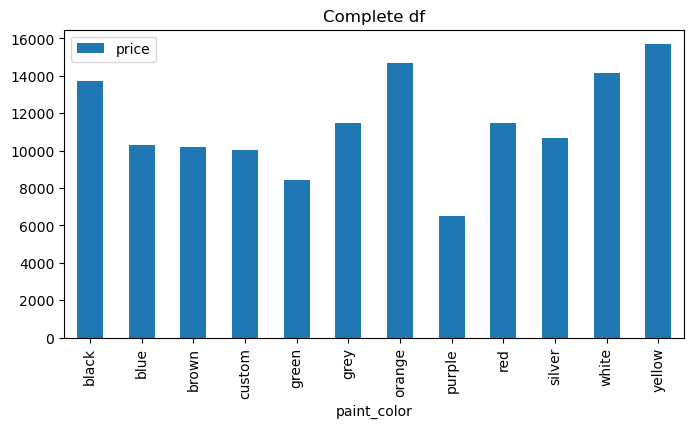

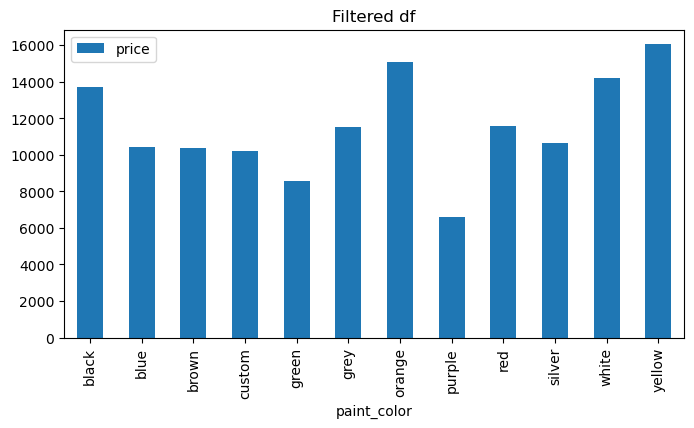

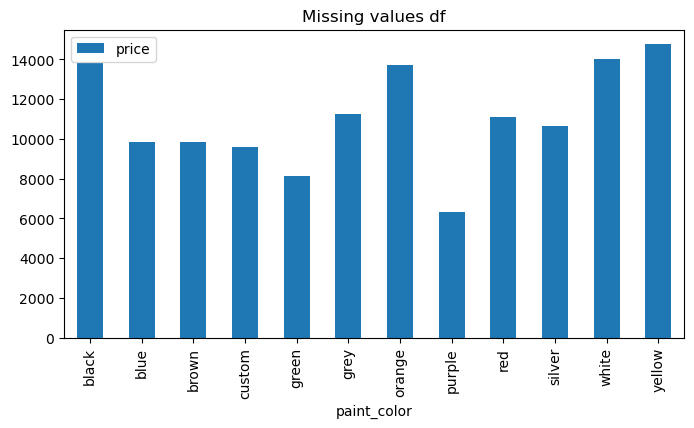

In [14]:
grouped_paint_full = df.groupby("paint_color").agg({"price": "mean"}).reset_index()
grouped_paint_filt = df_filtered.groupby("paint_color").agg({"price": "mean"}).reset_index()
grouped_paint_miss = df_miss.groupby("paint_color").agg({"price": "mean"}).reset_index()


grouped_paint_full.plot(x="paint_color", y="price", kind="bar", title='Complete df', figsize=(8, 4))
grouped_paint_filt.plot(x="paint_color", y="price", kind="bar", title='Filtered df', figsize=(8, 4))
grouped_paint_miss.plot(x="paint_color", y="price", kind="bar", title='Missing values df', figsize=(8, 4))

Vemos que en cuanto al color de la pintura, la distribución es prácticamente la misma, por lo que sustituiremos los valores ausentes de esa columna por 'Not avaliable' y probaremos el resultado

In [15]:
df["paint_color"] = df["paint_color"].fillna('Not avaliable')
df["paint_color"].value_counts()

white            10029
Not avaliable     9267
black             7692
silver            6244
grey              5037
blue              4475
red               4421
green             1396
brown             1223
custom            1153
yellow             255
orange             231
purple             102
Name: paint_color, dtype: int64

In [16]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Not avaliable,Yes,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,No,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,Not avaliable,No,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,No,2019-04-02,28


Hagamos lo mismo ahora con la columna 'cylinders'

<AxesSubplot:title={'center':'Missing values df'}, xlabel='cylinders'>

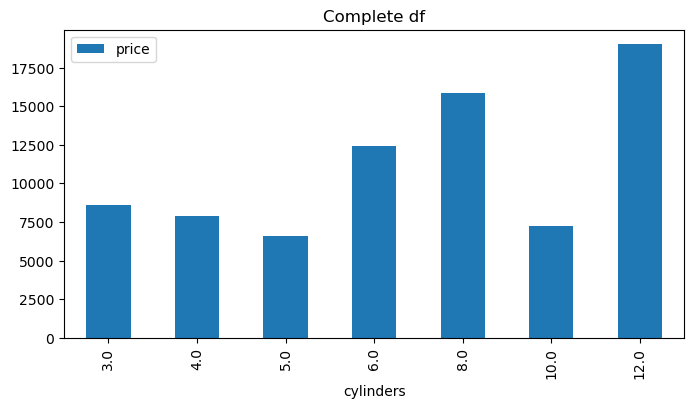

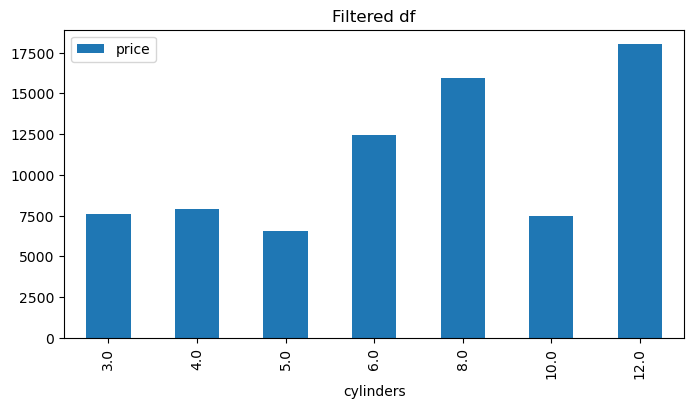

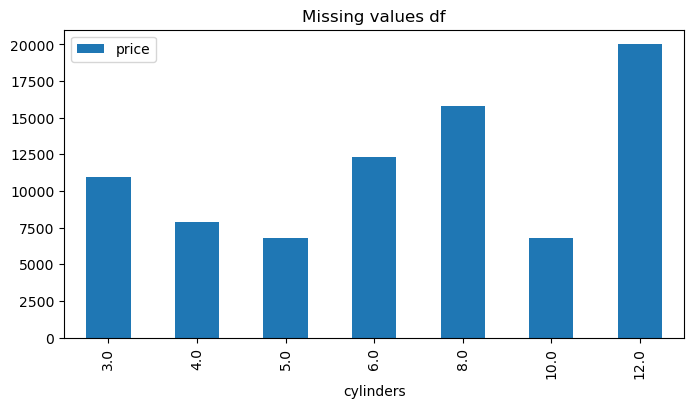

In [17]:
grouped_cyl_full = df.groupby("cylinders").agg({"price": "mean"}).reset_index()
grouped_cyl_filt = df_filtered.groupby("cylinders").agg({"price": "mean"}).reset_index()
grouped_cyl_miss = df_miss.groupby("cylinders").agg({"price": "mean"}).reset_index()


grouped_cyl_full.plot(x="cylinders", y="price", kind="bar", title='Complete df', figsize=(8, 4))
grouped_cyl_filt.plot(x="cylinders", y="price", kind="bar", title='Filtered df', figsize=(8, 4))
grouped_cyl_miss.plot(x="cylinders", y="price", kind="bar", title='Missing values df', figsize=(8, 4))

Vemos que en cuanto a la cilindrada, la distribución también es muy similar, por lo que haremos lo mismo que con la columna 'paint_color', sustituyendo los valores ausentes por la media del mismo modelo

In [18]:
def fill_cylinders(row):
    model = row['model']
    cylinders = row['cylinders']
    
    if pd.isna(cylinders):
        return df[df['model']==model]['cylinders'].median()
    return cylinders

df['cylinders'] = df.apply(fill_cylinders, axis=1)
df['cylinders'].isna().sum()

0

Repitamos el análisis con la columna 'odometer', comparándolo con algunas de las otras variables.

Adicionalmente, utilizaremos el coeficiente de correlación de Pearson vara ver si existe alguna diferencia en la relación lineal entre ambas variables en los diferentes DataFrames.

-0.47394785819529334
-0.4728054530475566
-0.4771775206424884


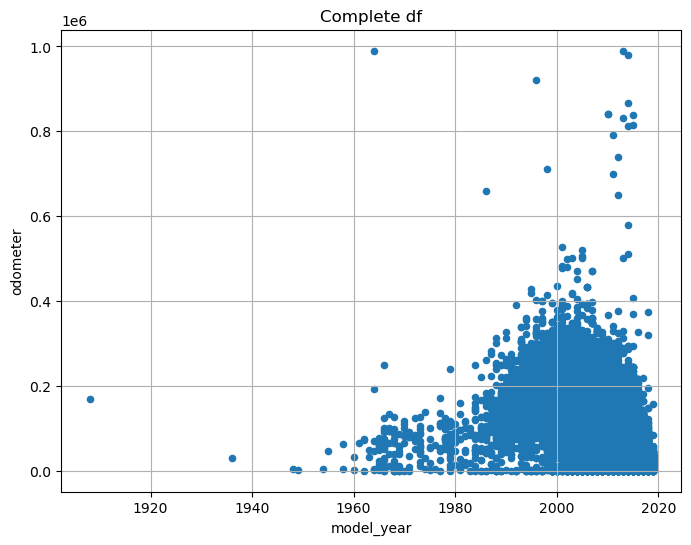

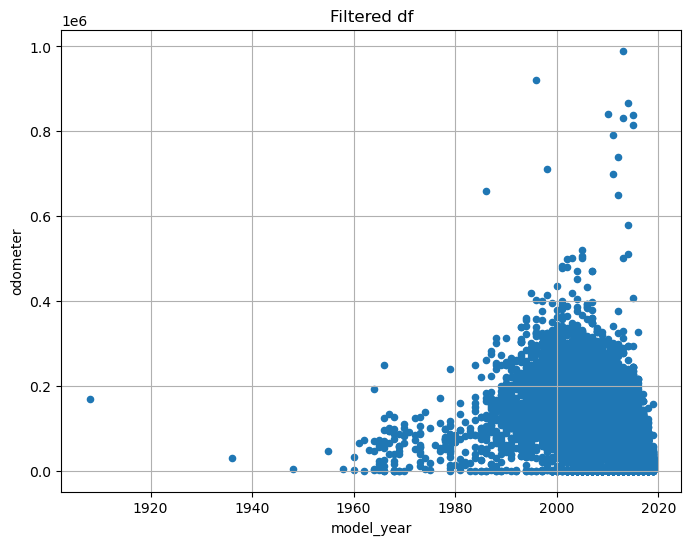

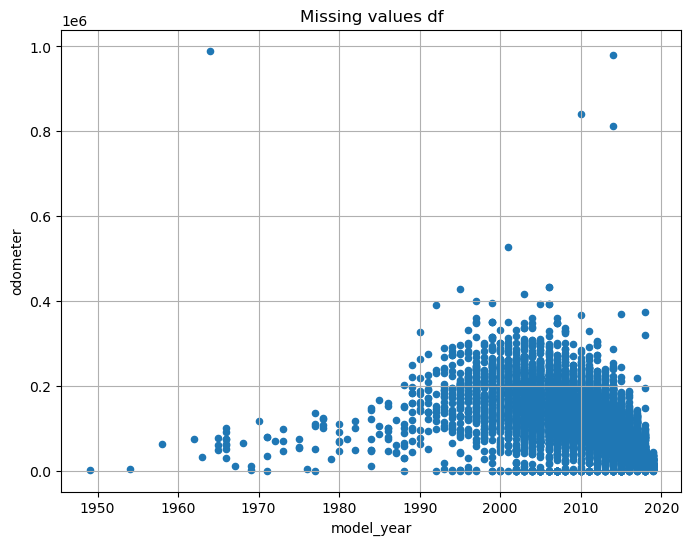

In [19]:
df.plot(x='model_year', y='odometer', kind='scatter', figsize=(8, 6), grid=True, title='Complete df')
df_filtered.plot(x='model_year', y='odometer', kind='scatter', figsize=(8, 6), grid=True, title='Filtered df')
df_miss.plot(x='model_year', y='odometer', kind='scatter', figsize=(8, 6), grid=True, title='Missing values df')

print(df['model_year'].corr(df['odometer']))
print(df_filtered['model_year'].corr(df_filtered['odometer']))
print(df_miss['model_year'].corr(df_miss['odometer']))

Al comparar la distribución de las variables tanto en el DataFrame completo como en que no tiene valores ausentes y el último donde solo hay filas que contienen algún valor ausente, que se aprecia una ligera diferencia en la distribución, agrupándose la mayor parte de los valores desde el año 1990 en adelante, mientras que en las otras dos tablas, el patrón es que la mayoría de los valores se agrupan desde el año 1980 en adelante. En cuanto al coeficiente de correlación de Pearson, es prácticamente el mismo en los tres escenarios, es una correlación negativa significativa que indica un mayor kilometraje mientras más antiguo es el auto.

En vista de que los modelos se repiten mucho a lo largo del DataFrame, hemos decidido completar los valores ausentes en la columna 'model_year' de la siguiente forma: Si un modelo específico no tiene el valor del año de fabricación, se sustituirá el valor ausente por la mediana del año de ese mismo modelo, entendiendo que hay filas donde si están completos estos dos campos.

Respecto a los valores ausentes en la columna 'odometer', la mayoría corresponde a autos cuya fecha de fabricación está entre 1980 y 1990. Sin embargo, como no hay forma de saber con certeza ni el año ni el kilometraje del auto con la información que tenemos y hemos apreciado valores atípicos como autos con casi un millón de kilómetros, hemos decidido cambiar los valores ausentes de esta columnas por la mediana según el año de fabricación, ya que esta es menos suceptible a los valores atípicos.

Se decidió no eliminar ninguna de las filas con valores ausentes en vista de que el patrón que se apreció muestra que la mayoría de las filas solo tienen un valor ausente, por lo que descartarlas sería perder valiosa información acerca de las otras variables.

In [20]:
def fill_model_year(row):
    model = row['model']
    model_year = row['model_year']
    
    if pd.isna(model_year):
        return df[df['model']==model]['model_year'].median()
    return model_year


df['model_year'] = df.apply(fill_model_year, axis=1)
fill_model_year(df.iloc[1])

2011.0

In [21]:
def fill_odometer(row):
    model_year = row['model_year']
    odometer = row['odometer']
    
    if pd.isna(odometer):
        return df[df['model_year']==model_year]['odometer'].median()
    return odometer

df['odometer'] = df.apply(fill_odometer, axis=1)
df['odometer'].isna().sum()

1

Vemos que aún queda una fila con valores ausentes. Revisemos con más detalle para corregirla.

In [22]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,No,2018-11-18,59


In [23]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['odometer'].isna().sum()

0

Ahora que no tenemos valores ausentes, cambiemos el tipo de datos de las columnas cylinders y model_year a int

In [24]:
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)

## Enriquecer datos

Agreguemos los años del vehículo cuando el anuncio se colocó

In [25]:
df['years'] = df['date_posted'].dt.year - df['model_year']

df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Not avaliable,Yes,2018-06-23,19,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,No,2019-02-07,79,6
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,Not avaliable,No,2019-03-22,9,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,No,2019-04-02,28,2
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,Yes,2018-06-20,15,4
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,No,2018-12-27,73,3
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,Yes,2019-01-07,68,6
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Not avaliable,Yes,2018-07-16,19,6
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,Yes,2019-02-15,17,11


Agreguemos ahora el millaje promedio del vehículo por año

In [26]:
def mean_mille(row):
    years = row['years']
    odometer = row['odometer']
    
    for row in df:
        if years == 0:
            return odometer
        return odometer / years
            
df['mean_mille'] = df.apply(mean_mille, axis=1)
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Not avaliable,Yes,2018-06-23,19,7,20714.285714
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50,7,12672.142857
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,No,2019-02-07,79,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,Not avaliable,No,2019-03-22,9,16,10087.312500
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,No,2019-04-02,28,2,40451.500000
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,Yes,2018-06-20,15,4,14488.500000
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,No,2018-12-27,73,3,26404.000000
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,Yes,2019-01-07,68,6,18245.500000
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Not avaliable,Yes,2018-07-16,19,6,17362.333333
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,Yes,2019-02-15,17,11,13381.000000


Veamos la cantidad de anuncios según el tipo de condición del auto

In [27]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

Vamos a reemplazar los valores de condición con algo que se pueda manipular más fácilmente. haremos una escala numérica:

- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [28]:
condition_dict = {'new': 5, 'excellent': 4, 'good': 3, 'like new': 2, 'fair': 1, 'salvage': 0}
df['cat_condition'] = df['condition'].map(condition_dict)

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Not avaliable,Yes,2018-06-23,19,7,20714.285714,3
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50,7,12672.142857,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,No,2019-02-07,79,6,18333.333333,2
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,Not avaliable,No,2019-03-22,9,16,10087.312500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,No,2019-04-02,28,2,40451.500000,4
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,Yes,2018-06-20,15,4,14488.500000,4
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,No,2018-12-27,73,3,26404.000000,4
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,Yes,2019-01-07,68,6,18245.500000,4
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Not avaliable,Yes,2018-07-16,19,6,17362.333333,4
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,Yes,2019-02-15,17,11,13381.000000,4




## Comprobar datos limpios

Sin valores ausentes, revisemos un poco los datos limpios para comprobar si todo funcionó correctamente

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int32         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  int32         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  object        
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  years          51525 non-null  int64         
 14  mean_mille     51525 non-null  float64       
 15  cat_condition  5152

In [30]:
df.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Not avaliable,Yes,2018-06-23,19,7,20714.285714,3
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50,7,12672.142857,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,No,2019-02-07,79,6,18333.333333,2
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,Not avaliable,No,2019-03-22,9,16,10087.312500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,No,2019-04-02,28,2,40451.500000,4
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,Yes,2018-06-20,15,4,14488.500000,4
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,No,2018-12-27,73,3,26404.000000,4
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,Yes,2019-01-07,68,6,18245.500000,4
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Not avaliable,Yes,2018-07-16,19,6,17362.333333,4
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,Yes,2019-02-15,17,11,13381.000000,4


Revisemos por último que no haya datos duplicados

In [31]:
df.duplicated().sum()

0

## Estudiar parámetros principales

Con nuestro DataFrame más ordenado, vamos a estudiar los parámetros enumerados a continuación, para comenzar a dar respuesta a la pregunta: ¿Qué factores impactan más sobre el precio? necesitamos resultados para determinar si el precio depende de la edad, millaje, condición, tipo de transmisión y color

En ese sentido, los parámetros que revisaremos son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Comencemos por el precio. Ordenemos la los valores de la columna para ver una muestra de los valores máximos y mínimos.

In [32]:
df.sort_values("price", ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
12504,375000,1999,nissan frontier,good,6,gas,115000.0,automatic,pickup,blue,Yes,2018-05-19,21,19,6052.631579,3
11359,300000,2015,ram 2500,excellent,6,diesel,78285.5,automatic,truck,grey,Yes,2018-10-15,39,3,26095.166667,4
34389,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,No,2019-02-02,28,5,30249.600000,3
1309,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,No,2019-03-02,56,5,30249.600000,3
27375,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,No,2018-09-25,72,4,37812.000000,3
1668,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,Not avaliable,No,2019-03-20,21,5,30249.600000,3
33434,189000,2014,ford f-150,good,6,gas,151248.0,automatic,truck,black,No,2019-02-05,102,5,30249.600000,3
30634,189000,2014,ford f-150,good,6,gas,90000.0,automatic,truck,black,No,2018-07-21,42,4,22500.000000,3
34206,175000,2004,gmc sierra 2500hd,good,8,diesel,149000.0,automatic,truck,grey,Yes,2018-08-25,57,14,10642.857143,3
41748,145000,2008,toyota tundra,like new,8,gas,140000.0,automatic,truck,red,Yes,2018-06-16,29,10,14000.000000,2


In [33]:
df.sort_values("price", ascending=False).tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
11736,1,2017,ram 3500,excellent,10,gas,57482.0,other,truck,white,Yes,2018-05-27,21,1,57482.000000,4
14000,1,2015,chevrolet camaro,excellent,10,gas,28926.0,other,coupe,grey,Yes,2018-09-20,56,3,9642.000000,4
14001,1,2016,dodge charger,excellent,10,gas,29406.0,other,sedan,red,Yes,2018-05-23,8,2,14703.000000,4
11737,1,2017,jeep grand cherokee,excellent,10,gas,41000.0,other,SUV,white,Yes,2019-04-02,79,2,20500.000000,4
13072,1,2013,dodge charger,excellent,6,gas,29406.0,other,sedan,red,Yes,2018-06-22,11,5,5881.200000,4
24988,1,2009,chevrolet tahoe,like new,8,gas,131565.0,automatic,SUV,blue,No,2019-02-10,81,10,13156.500000,2
11738,1,2015,ford edge,excellent,6,gas,78285.5,automatic,SUV,black,Yes,2018-07-12,24,3,26095.166667,4
11739,1,2018,nissan altima,excellent,10,gas,42007.0,other,sedan,custom,Yes,2018-10-27,42,0,42007.000000,4
24989,1,2007,chevrolet tahoe,like new,8,gas,1.0,automatic,SUV,blue,No,2019-03-04,44,12,0.083333,2
25972,1,2017,dodge charger,excellent,6,gas,51482.0,other,sedan,red,Yes,2019-03-09,23,2,25741.000000,4


Podemos ver que el precio máximo es de 375000, y que la mayoría de los autos de mayor valor tienen la condición 2 (good). Tembién podemos ver que el menor precio es 1, y que la mayoría de los autos que lo tienen en la muestra son de la condición 3 (excellent).

Filtremos el DataFrame y comparemos la distribución de los precios en el conjunto completo contra solo la de los autos con la condición 2 y los de la condición 3, y estableceremos el rango de 0 a 375000 para ver la distribución completa del precio.

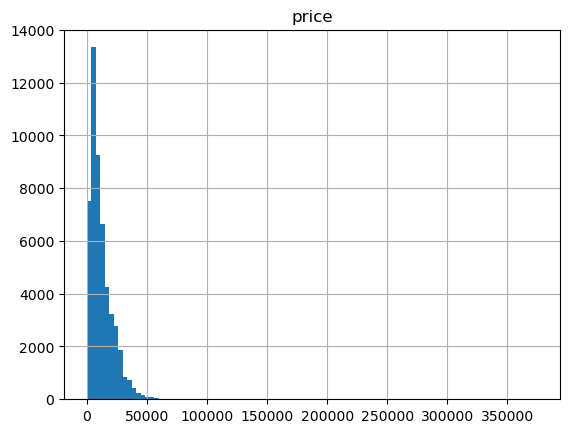

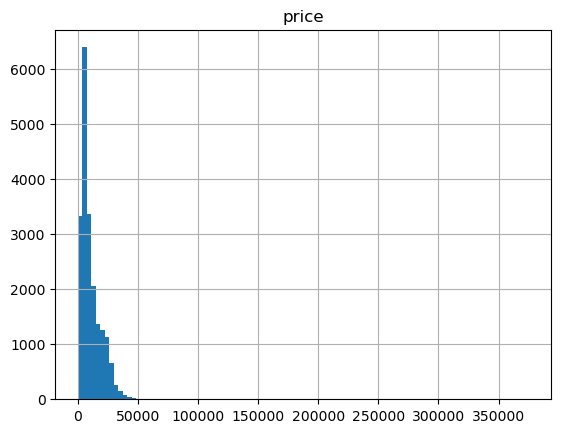

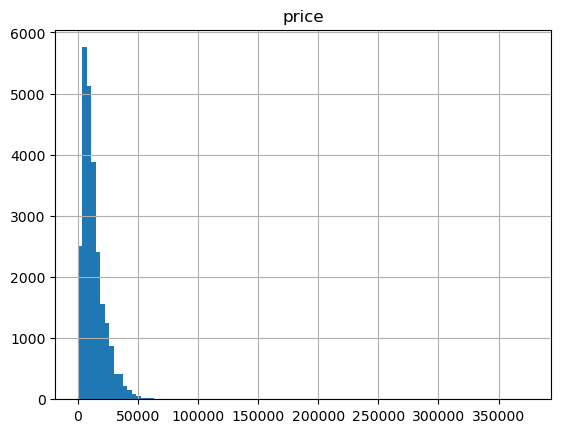

In [34]:
good = df.query('condition == "good"')
excellent = df.query('condition == "excellent"')

df.hist("price", range=(0, 375000), bins=100)
plt.show()
good.hist("price", range=(0, 375000), bins=100)
plt.show()
excellent.hist("price", range=(0, 375000), bins=100)
plt.show()

Podemos ver que la distribución es similar, solo con una menor cantidad de valores en los DataFrame filtrados porque obviamente son menos filas. También vemos que los precios apenas pasan los 60000. Vamos a acotar el rango para ver con más detalle la distribución. Esta vez usaremos solo el DataFrame completo.

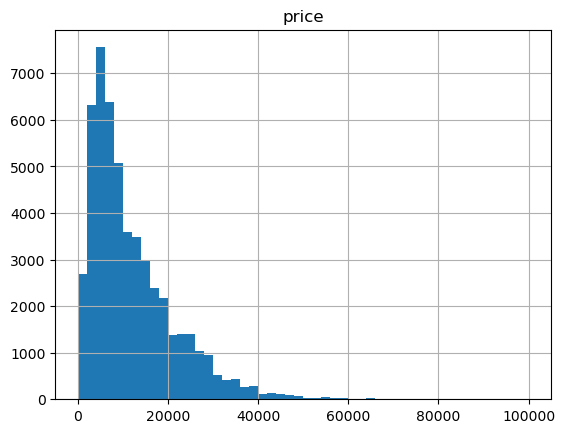

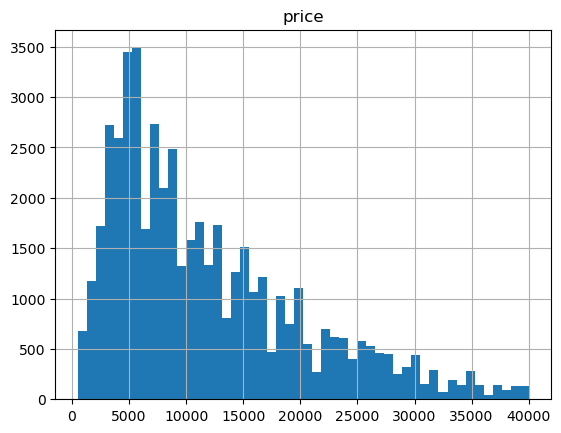

In [35]:
df.hist('price', bins=50, range=(0, 100000))
plt.show()
df.hist('price', bins=50, range=(500, 40000))
plt.show()

Veamos un poco el detalle de los precios más bajos, para determinar cuales son valores irreales

In [36]:
def show_condition(row):
    price = row['price']
    condition = row['condition']
    
    if price < 1000:
        return condition
    return 'OK'

df_sample = df.apply(show_condition, axis=1)
print(df_sample.value_counts())
print(df_sample.count())

OK           50121
excellent      983
fair           185
good           106
like new        95
salvage         28
new              7
dtype: int64
51525


Calculemos también el rango fuera del cual estarían los valores atípicos usando un diagrama de cajas

First quartile: 5000.0
Third quartile: 16839.0
IQR: 11839.0
Límite inferior: -12758.5
Límite superior: 34597.5


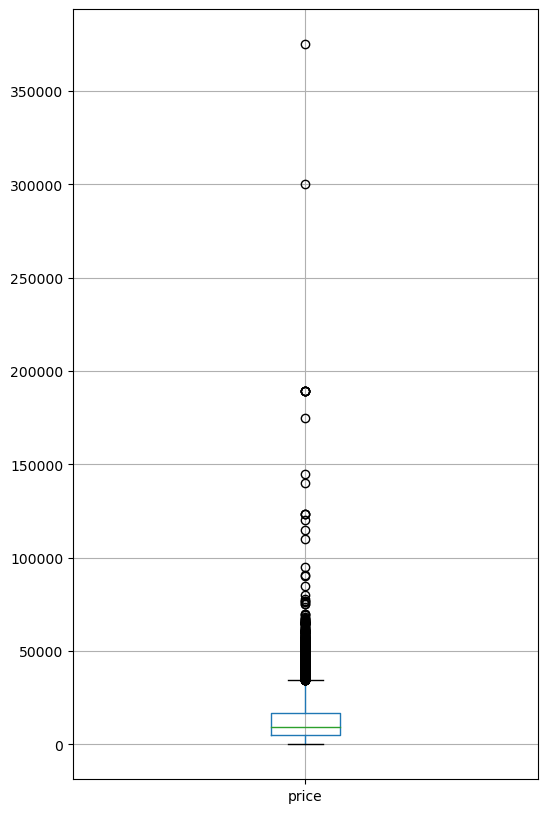

In [37]:
df.boxplot(column='price', figsize=(6, 10))
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print("First quartile:", Q1)
print("Third quartile:", Q3)
print("IQR:", IQR)
print("Límite inferior:", Q1 - 1.5 * IQR)
print("Límite superior:", Q3 + 1.5 * IQR)

Respecto al límite inferior, podeos ver que hay 1404 autos con un precio por debajo de los 1000. Esto es un valor irreal, excepto para la condición 0 o salvage. Vamos a establecer como límite mínimo para el precio de 1000 ya un valor más razonable, excepto para la condición 0, que podrá tener valores por debajo de ese precio.

Ahora, hablando del límite superior, podemos ver que, prácticamente, son pocos los autos que pasan los 60000, y que no hay una cantidad significativa de autos con un valor sobre los 80000. Según lo que nos dice el diagrama, vamos a establecer un límite máximo para el precio de 35000, considerando el resultado con el rango calculado por medio de los cuartiles.

In [38]:
df_good = df.query('price <= 35000')
test = df_good.query('price < 1000 and cat_condition == 0').index
pd.concat([df_good.query('price >= 1000'), df_good[df_good.index.isin(test)]])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Not avaliable,Yes,2018-06-23,19,7,20714.285714,3
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50,7,12672.142857,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,No,2019-02-07,79,6,18333.333333,2
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,Not avaliable,No,2019-03-22,9,16,10087.312500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,No,2019-04-02,28,2,40451.500000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43000,700,2006,dodge charger,salvage,6,gas,212523.0,manual,sedan,grey,No,2018-10-17,100,12,17710.250000,0
44871,450,2004,jeep grand cherokee,salvage,8,gas,180000.0,automatic,SUV,red,Yes,2018-06-21,38,14,12857.142857,0
49163,500,2010,subaru outback,salvage,4,gas,267372.0,automatic,wagon,green,Yes,2018-05-26,17,8,33421.500000,0
50213,850,1997,ford f150,salvage,8,gas,238240.0,automatic,pickup,Not avaliable,Yes,2019-01-20,7,22,10829.090909,0


Ahora, hagamos un análisis de la columna years

In [39]:
df.sort_values("years", ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
33907,12995,1908,cadillac escalade,excellent,8,gas,169328.0,automatic,SUV,white,No,2018-06-24,25,110,1539.345455,4
33906,12995,1908,gmc yukon,good,8,gas,169328.0,automatic,SUV,black,No,2018-07-06,34,110,1539.345455,3
45694,18000,1929,ford f-150,good,8,gas,114074.0,manual,other,silver,No,2018-11-18,59,89,1281.730337,3
34713,5000,1936,ford f-150,excellent,6,gas,30000.0,manual,pickup,purple,No,2018-11-22,10,82,365.853659,4
22595,21000,1948,chevrolet impala,like new,8,gas,4000.0,automatic,sedan,red,No,2019-01-18,24,71,56.338028,2
36582,44900,1949,chevrolet suburban,good,8,gas,1800.0,automatic,wagon,orange,No,2018-08-19,10,69,26.086957,3
14752,15000,1954,ford f-150,excellent,8,gas,3565.0,manual,pickup,black,No,2019-02-16,13,65,54.846154,4
10018,23900,1955,ford f250,excellent,6,gas,47180.0,manual,truck,blue,No,2018-12-22,61,63,748.888889,4
39580,35000,1958,chevrolet impala,excellent,8,gas,3184.0,automatic,coupe,black,No,2018-05-19,33,60,53.066667,4
48414,37900,1958,chevrolet impala,good,8,gas,62799.0,automatic,coupe,Not avaliable,No,2018-08-11,10,60,1046.650000,3


In [40]:
df.sort_values("years", ascending=False).tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
24717,36488,2019,toyota highlander,good,6,gas,9418.0,automatic,SUV,black,Yes,2019-04-12,15,0,9418.0,3
42886,42995,2018,chevrolet suburban,excellent,8,gas,40800.0,automatic,SUV,black,Yes,2018-12-08,38,0,40800.0,4
46396,11995,2018,nissan sentra,good,4,gas,36700.0,other,sedan,silver,No,2018-10-16,11,0,36700.0,3
24744,33900,2019,jeep wrangler,good,6,gas,12369.0,automatic,SUV,white,Yes,2019-02-23,35,0,12369.0,3
46392,16995,2018,honda accord,good,4,gas,8900.0,automatic,sedan,Not avaliable,No,2018-10-21,10,0,8900.0,3
9001,15950,2018,volkswagen jetta,excellent,4,gas,35775.0,automatic,sedan,white,No,2018-12-22,21,0,35775.0,4
5005,39997,2018,toyota tundra,excellent,8,gas,13051.0,automatic,truck,Not avaliable,Yes,2018-06-20,12,0,13051.0,4
9002,36950,2018,chevrolet silverado 1500,excellent,8,gas,13047.0,automatic,pickup,black,No,2018-05-27,19,0,13047.0,4
46394,15895,2018,honda civic,good,4,gas,14189.0,automatic,sedan,silver,No,2018-11-06,10,0,14189.0,3
22894,1,2019,ford explorer,excellent,10,gas,26504.0,other,SUV,red,Yes,2019-03-08,34,0,26504.0,4


Respecto al límite superior, podemos ver que hay autos con más de 100 años. En el límite inferior, podemos ver autos con cero años, lo que es posible si se trata de un auto del año en curso. Por eso, no haremos nada con los autos de cero años, pero si revisaremos la distribución para determinar el máximo de años que dejaremos en nuestro DataFrame.

array([[<AxesSubplot:title={'center':'years'}>]], dtype=object)

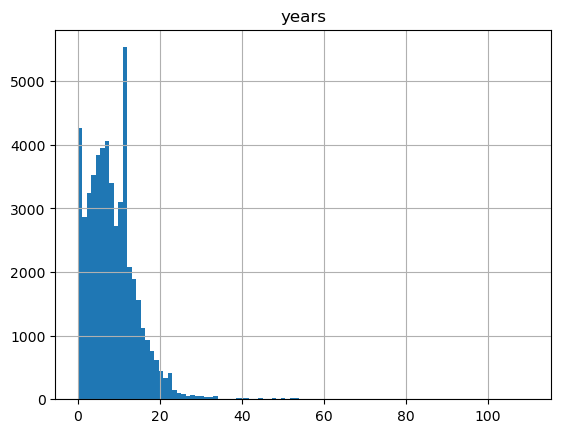

In [41]:
df.hist('years', bins=100, range=(0, 110))

Vemos un pico muy pronunciado cerca de los 10 años. Vamos a hacer zoom para ver de que se trata

array([[<AxesSubplot:title={'center':'years'}>]], dtype=object)

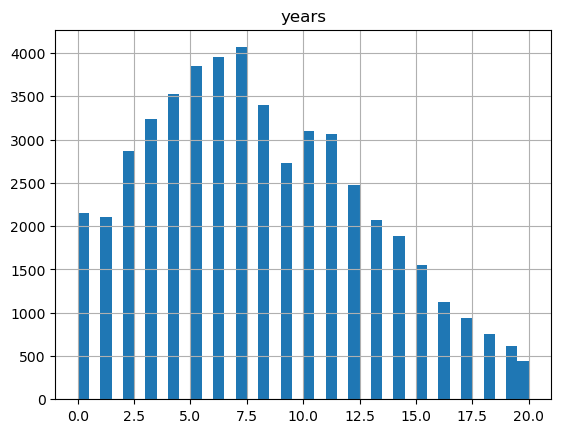

In [42]:
df.hist('years', bins=40, range=(0, 20))

Al mirar más de cerca, vemos que el pico deaparece y que hay algunos autos que tienen un año con un valor decimal, como 7.5.

Podemos ver en el histograma que prácticamente no hay autos con más de 60 años, por lo que revisaremos con más detalle por medio de un diagrama de caja para establecer el límite máximo para esta columna, actualizando la variable 'df_good'

First quartile: 4.0
Third quartile: 12.0
IQR: 8.0
Límite inferior: -8.0
Límite superior: 24.0


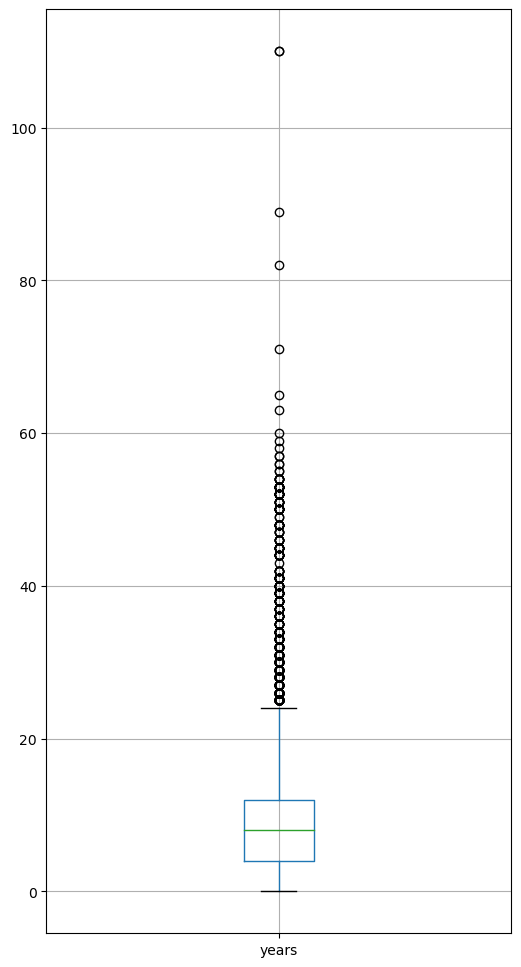

In [43]:
df_good.boxplot(column='years', figsize=(6, 12))
Q1 = df_good['years'].quantile(0.25)
Q3 = df_good['years'].quantile(0.75)
IQR = Q3 - Q1
print("First quartile:", Q1)
print("Third quartile:", Q3)
print("IQR:", IQR)
print("Límite inferior:", Q1 - 1.5 * IQR)
print("Límite superior:", Q3 + 1.5 * IQR)

Según el análisis, el límite superior para los valores típicos es de 24 años. Actualizemos nuestro DataFrame filtrado

In [44]:
df_good = df_good.query('years <= 24')
df_good.shape

(49401, 16)

Repitamos un análisis similar a la columna odometer

In [45]:
df.sort_values("odometer", ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
40729,4700,2013,chevrolet cruze,good,6,gas,990000.0,automatic,sedan,black,No,2018-05-02,4,5,198000.000000,3
17869,59900,1964,chevrolet corvette,like new,8,gas,990000.0,automatic,convertible,red,No,2018-06-17,28,54,18333.333333,2
48962,40000,2014,ram 3500,excellent,6,diesel,980000.0,automatic,truck,white,Yes,2018-12-06,7,4,245000.000000,4
14245,6000,1996,ram 2500,good,10,gas,920000.0,automatic,truck,blue,No,2019-02-02,43,23,40000.000000,3
2840,18500,2014,ford explorer,excellent,6,gas,866000.0,automatic,SUV,black,Yes,2018-07-20,14,4,216500.000000,4
2440,5300,2010,toyota corolla,excellent,4,gas,840000.0,automatic,sedan,silver,No,2019-02-04,13,9,93333.333333,4
32973,5550,2010,toyota corolla,excellent,4,gas,840000.0,automatic,sedan,silver,No,2018-10-21,20,8,105000.000000,4
13027,8500,2015,chevrolet malibu,excellent,4,gas,838095.0,automatic,sedan,silver,No,2018-05-30,10,3,279365.000000,4
41699,10300,2013,ford escape,excellent,6,gas,831000.0,automatic,SUV,brown,No,2018-05-27,30,5,166200.000000,4
5735,7500,2015,hyundai elantra,excellent,4,gas,813542.0,other,coupe,brown,No,2018-11-21,5,3,271180.666667,4


In [46]:
df.sort_values("odometer", ascending=False).tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
42924,9900,2017,hyundai elantra,good,4,gas,0.0,automatic,sedan,red,No,2018-11-16,66,1,0.0,3
40438,12900,2015,toyota camry,excellent,4,gas,0.0,automatic,sedan,custom,No,2018-11-04,31,3,0.0,4
48186,8988,2005,chevrolet silverado 1500,good,8,gas,0.0,automatic,truck,silver,Yes,2019-01-10,18,14,0.0,3
48187,10888,2011,chevrolet silverado 3500hd,good,8,diesel,0.0,automatic,truck,white,No,2018-08-17,57,7,0.0,3
40436,26900,2014,gmc sierra 1500,excellent,8,gas,0.0,automatic,truck,silver,Yes,2018-10-17,17,4,0.0,4
40432,12900,2016,chevrolet impala,excellent,6,gas,0.0,automatic,sedan,black,No,2018-10-29,11,2,0.0,4
40431,4900,2002,honda civic,good,4,gas,0.0,manual,hatchback,silver,No,2018-08-11,58,16,0.0,3
27923,5888,2004,toyota 4runner,good,6,gas,0.0,automatic,SUV,black,No,2018-10-29,40,14,0.0,3
7517,10500,1966,chevrolet impala,fair,8,gas,0.0,automatic,convertible,yellow,No,2019-03-16,27,53,0.0,1
9106,10888,2011,chevrolet silverado 3500hd,good,8,diesel,0.0,automatic,truck,white,No,2018-09-11,50,7,0.0,3


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

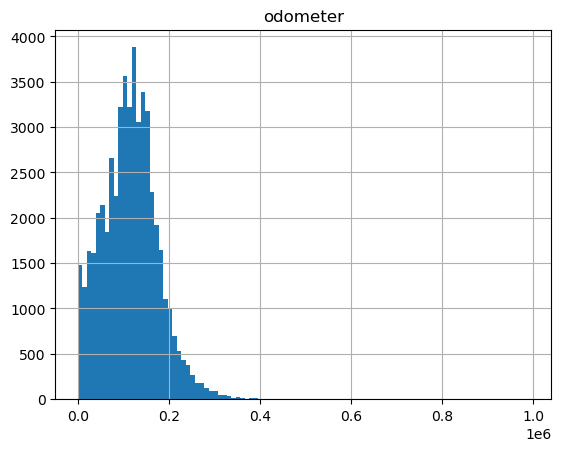

In [47]:
df.hist('odometer', bins=100, range=(0, 990000))

Podemos ver que hay autos con 990.000 millas, lo cual no es un número muy factible. Además, son muy pocos, porque en el gráfico apreciamos que pocos autos tienen más de 400.000 millas. En el otro lado, vemos autos con 0 millas, pero que no son del año. Estos podrían ser autos comprados para revenderse y que no se han utilizado, ya que, en algunos casos, pueden durar años en exhibición. El histograma nos da una idea de la distribución, pero veámoslo con mayor detalle agrupando por el año

In [48]:
df_grouped = df_good.groupby('years').agg(
{"odometer": ["min", 'max', "mean", "median"]}).sort_values(by='years')
df_grouped

odometer                                   
           min       max           mean    median
years                                            
0          0.0  373200.0   23028.745815   20674.0
1          0.0  164409.0   42738.061450   41000.0
2          0.0  327000.0   56978.602699   53998.5
3          0.0  838095.0   75963.640138   76920.0
4          0.0  866000.0   89043.212522   89606.0
5          0.0  990000.0  100495.786034   99840.0
6          0.0  740000.0  109292.039959  110000.0
7          0.0  790000.0  121090.890918  123000.0
8          0.0  840000.0  125714.583604  126776.0
9          0.0  840000.0  131219.360316  131565.0
10         0.0  336000.0  139076.335935  140000.0
11         0.0  469445.0  142428.894771  142000.0
12         0.0  433120.0  149531.756987  150839.0
13         0.0  520000.0  151521.307767  153108.0
14         0.0  470000.0  156501.366242  156640.0
15         0.0  452000.0  161034.370084  161397.0
16         0.0  500000.0  159127.139804  160000.0
17         0.0  527835.0  169618.152034  173318.0
18         0.0  482000.0  175048.470667  175000.0
19         0.0  434762.0  176486.542623  174875.0
20         0.0  415000.0  174025.559819  170592.0
21       155.0  710000.0  176292.000000  183533.0
22         0.0  400000.0  177364.626609  171000.0
23       160.0  920000.0  171374.109195  162500.0
24         0.0  360000.0  155327.653333  155500.0

Podemos ver que en todos los años, la media y la mediana son muy similares. Veamos si este patrón se repite al agurpar por condición

In [49]:
df_grouped = df.groupby('cat_condition').agg(
{"odometer": ["min", 'max', "mean", "median"]})
df_grouped

odometer                                   
                   min       max           mean    median
cat_condition                                            
0                  0.0  482000.0  140108.639130  142000.0
1                  0.0  500000.0  178461.731798  174875.0
2                  0.0  990000.0   80789.537537   76000.0
3                  0.0  990000.0  128666.686622  128750.0
4                  0.0  980000.0  107014.732370  106000.0
5                  5.0  315000.0   46105.555944   12632.0

Efectivamente, se repite el patrón, aunque esta vez la mediana de 5 se aleja de la media. Considerando que hay muchos valores mínimos en 0, vamos a revisar cuántos autos hay con menos de 1000 millas y qué porcentaje del DataFrame representan

In [50]:
df_odo = df.query('odometer <= 1000')
print(len(df_odo)/len(df))
df_odo.head(10)

0.016341581756428917


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
73,1900,1994,jeep grand cherokee laredo,good,6,gas,207.0,automatic,SUV,grey,Yes,2018-07-27,9,24,8.625000,3
222,2750,2006,honda civic lx,good,4,gas,200.0,manual,sedan,black,No,2018-07-06,41,12,16.666667,3
352,7997,2009,gmc yukon,excellent,8,gas,0.0,automatic,SUV,white,Yes,2019-03-16,88,10,0.000000,4
501,6300,2003,toyota rav4,excellent,4,gas,107.0,automatic,SUV,red,Yes,2018-09-16,24,15,7.133333,4
510,3900,2008,ford escape,good,4,gas,137.0,automatic,SUV,Not avaliable,No,2018-08-02,59,10,13.700000,3
621,7999,2010,honda accord,like new,4,gas,91.0,automatic,sedan,silver,No,2018-07-23,18,8,11.375000,2
732,6750,2007,ram 1500,good,8,gas,168.0,automatic,pickup,brown,Yes,2018-06-15,29,11,15.272727,3
814,2995,1999,ford f-150,good,6,gas,0.0,manual,truck,Not avaliable,No,2019-03-14,16,20,0.000000,3
833,44505,2019,dodge charger,new,8,gas,202.0,automatic,sedan,black,No,2019-02-06,44,0,202.000000,5
929,4995,2003,ford f-150,like new,8,gas,181.0,automatic,truck,brown,No,2018-05-16,60,15,12.066667,2


Vemos que los autos con menos de 1000 millas representan solo el 1.6% de los datos, y que al parecer son valores errados, ya que en la muestra que inprimimos solo un auto tiene 0 años, y, como vimos en los gráficos de dispersión de la sección tratar los valores ausentes, el kilometraje es directamente proporcional a la edad del auto. De igual forma, vemos que, en las agrupaciones que hicimos, ninguna media o mediana superan las 200.000 millas. Veamos un histograma acotando el rango a estos valores y a lo que vimos en el primer histograma.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

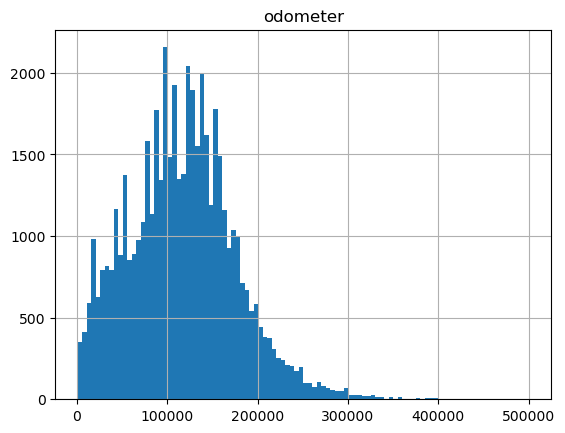

In [51]:
df.hist('odometer', bins=100, range=(1000, 500000))

Vemos que, efectivamente, muy pocos autos superan las 400.000 millas. Vamos a hacer un diagrama de cajas para calcular el rango intercuartílico y así poder definir el límite superior e inferior

First quartile: 77414.0
Third quartile: 153108.0
IQR: 75694.0
Límite inferior: -36127.0
Límite superior: 266649.0


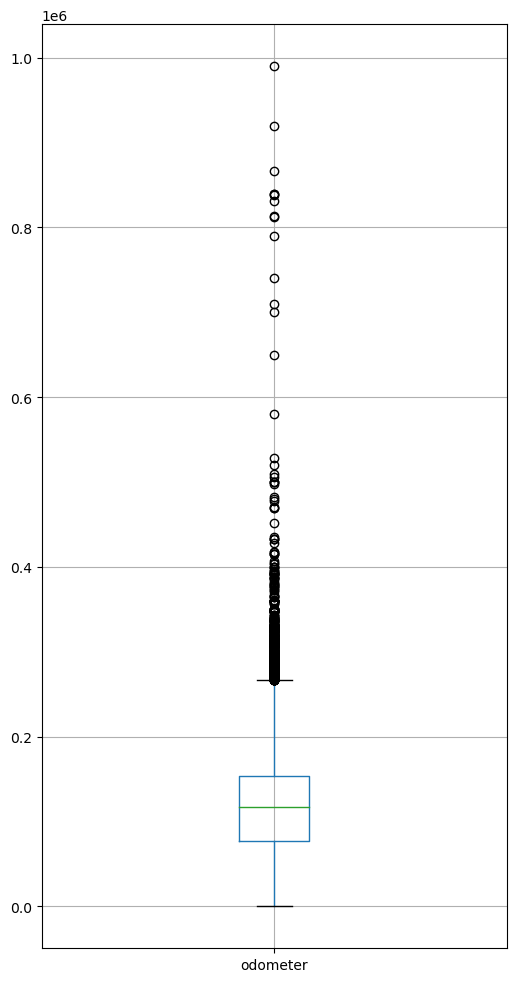

In [52]:
df_good.boxplot(column='odometer', figsize=(6, 12))
Q1 = df_good['odometer'].quantile(0.25)
Q3 = df_good['odometer'].quantile(0.75)
IQR = Q3 - Q1
print("First quartile:", Q1)
print("Third quartile:", Q3)
print("IQR:", IQR)
print("Límite inferior:", Q1 - 1.5 * IQR)
print("Límite superior:", Q3 + 1.5 * IQR)

Según el diagrama, establaceremos como límite superior el IQR y como límite inferior 1000 millas, considerando que la muestra de autos con este kilometraje arrojó valores atípicos y representa solo el 1.6 de los datos. Si bien puede ser posible que algunos de los autos tengan 0 millas, no los tomaremos en cuenta para el estudio por tratarse de una cantidad pequeña.

In [53]:
df_good = df_good.query('odometer >= 1000 and odometer <= 258312')
df_good.shape

(47786, 16)

Ahora, vamos con la columna referente a la cilindrada

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

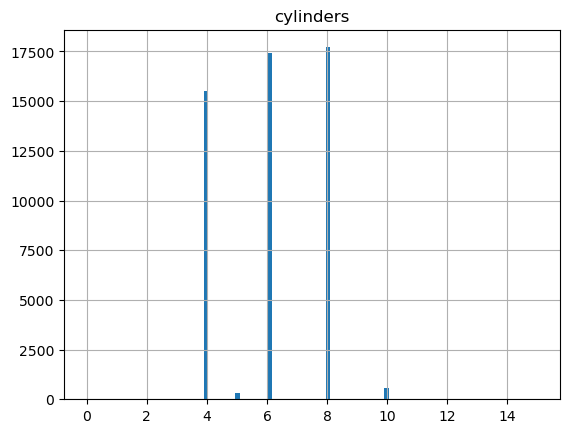

In [54]:
df.hist('cylinders', bins=100, range=(0, 15))

Revisemos esos valores de 12 y 3 cilindros, ya que, si bien, existen motores con esa cilindrada, no son muy comunes

In [55]:
df_12cyl = df.query('cylinders >= 12')
df_12cyl

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
12615,18000,2001,ram 2500,excellent,12,diesel,167500.0,manual,truck,silver,Yes,2018-08-05,22,17,9852.941176,4
44117,20000,2004,ford f350 super duty,excellent,12,diesel,156640.0,automatic,truck,grey,Yes,2019-03-29,24,15,10442.666667,4


In [56]:
df_3cyl = df.query('cylinders <= 3')
df_3cyl

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
1527,6000,2011,toyota prius,excellent,3,gas,143000.0,automatic,hatchback,black,No,2018-12-30,37,7,20428.571429,4
3882,6200,2008,ford f-150,excellent,3,gas,166000.0,automatic,truck,white,No,2018-06-30,67,10,16600.000000,4
9244,800,1999,ford ranger,good,3,gas,192000.0,automatic,pickup,white,No,2018-05-29,33,19,10105.263158,3
12596,20500,2010,jeep wrangler,excellent,3,gas,79300.0,automatic,SUV,Not avaliable,Yes,2019-02-08,8,9,8811.111111,4
14483,3900,2000,ford ranger,good,3,gas,137780.0,automatic,pickup,blue,Yes,2018-09-24,16,18,7654.444444,3
14932,1150,2004,honda civic,fair,3,diesel,210000.0,automatic,sedan,blue,No,2019-02-09,25,15,14000.000000,1
16672,2500,2009,honda civic lx,excellent,3,hybrid,250000.0,automatic,sedan,grey,No,2019-02-06,29,10,25000.000000,4
17239,6000,2009,chevrolet traverse,good,3,gas,63000.0,automatic,SUV,green,No,2018-11-02,48,9,7000.000000,3
21102,26124,2018,ford escape,excellent,3,gas,2050.0,automatic,SUV,black,Yes,2018-10-25,29,0,2050.000000,4
22183,1,2015,ford focus se,like new,3,gas,78285.5,manual,sedan,Not avaliable,No,2018-10-17,78,3,26095.166667,2


Podemos ver que los modelos que en el DataFrame indican tener 3 y 12 cilindros, están errados. Esto cotejado con inforación investigada en internet en diversas páginas de información automotriz. Por tal motivo, dejaremos para nuestro análisis solos los autos de 4 a 10 cilindros, nuevamente actualizando la variable df_good.

In [57]:
df_good = df_good.query('cylinders >= 4 and cylinders <= 10')
df_good.shape

(47752, 16)

In [58]:
df_good['cylinders'].value_counts()

6     16451
8     15540
4     14938
10      534
5       289
Name: cylinders, dtype: int64

Analicemos por último los valores de la columna cat_condition

<AxesSubplot:>

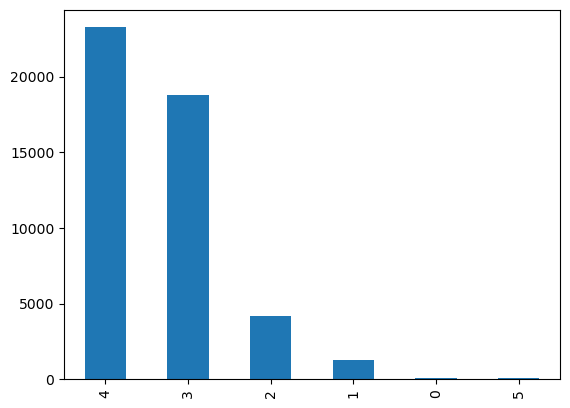

In [59]:
df_good['cat_condition'].value_counts().plot(kind='bar')

Podemos ver la distribución ordenada por categorías. Aquí, no eliminaremos nada, ya que son muy pocos los valores de las categorías 0 y 5, pero de igual forma son importantes.

Con el análisis anterior, determinamos los valores atípicos y creamos un DataFrame sin ellos. lo que hicimos básicamente fue definir el límite inferior/superior para el rango normal por medio de diagramas de caja y cuartiles. Echemos un vistazo al DataFrame filtrado:

In [60]:
df_good.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,Not avaliable,Yes,2018-06-23,19,7,20714.285714,3
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,Yes,2018-10-19,50,7,12672.142857,3
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,No,2019-02-07,79,6,18333.333333,2
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,Not avaliable,No,2019-03-22,9,16,10087.312500,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,No,2019-04-02,28,2,40451.500000,4
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,Yes,2018-06-20,15,4,14488.500000,4
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,No,2018-12-27,73,3,26404.000000,4
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,Yes,2019-01-07,68,6,18245.500000,4
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Not avaliable,Yes,2018-07-16,19,6,17362.333333,4
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,Yes,2019-02-15,17,11,13381.000000,4


## Estudiar parámetros principales sin valores atípicos

Vamos a crear nuevos histogramas con los datos filtrados, para compararlos con los histogramas anteriores que contienen los valores atípicos incluidos y así comenzar a sacar conclusiones. Comparemos primero los datos referentes al precio.

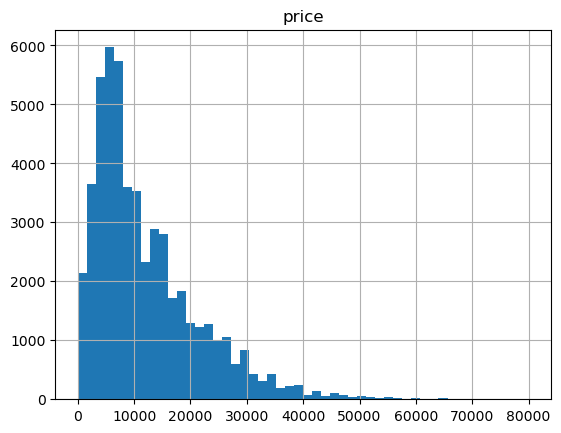

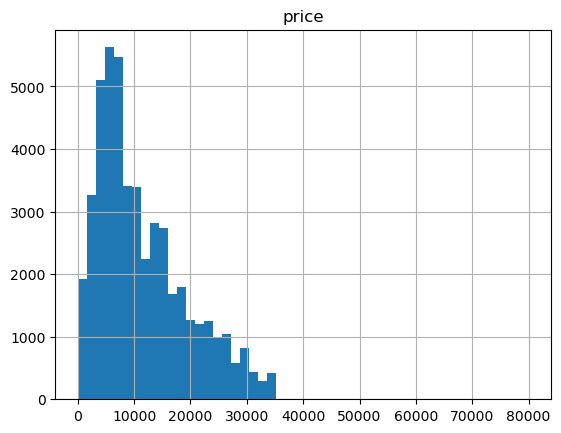

In [61]:
df.hist('price', bins=50, range=(0, 80000))
plt.show()
df_good.hist('price', bins=50, range=(0, 80000))
plt.show()

Podemos ver que la distribución es similiar entre el conjunto con valores atípicos y el que no los tiene, apreciando diferencias en el límite inferior, ya que se retiraron los autos con precio por debajo de 1000, y superior (ahora con valores que no superan los 35000). Vamos a mirar más de cerca el histograma del DataFrame filtrado, haciendo zoom a la zona donde se encuentra la mayor cantidad de valores

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

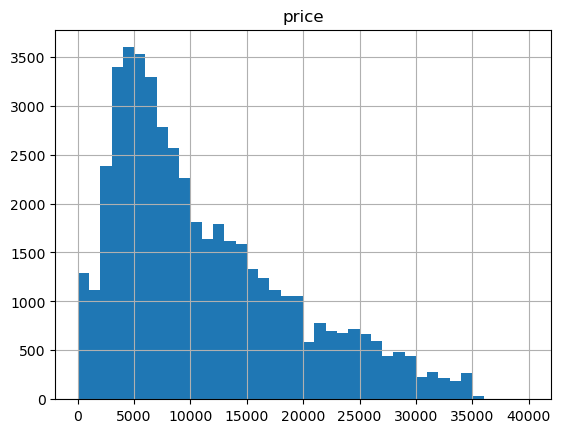

In [62]:
df_good.hist('price', bins=40, range=(0, 40000))

Esta visión más cercana nos permite ver claramente que la mayor cantidad de autos publicados, tienen un valor que está entre los 4000 y 7000

Comparemos ahora los valores de la columna years

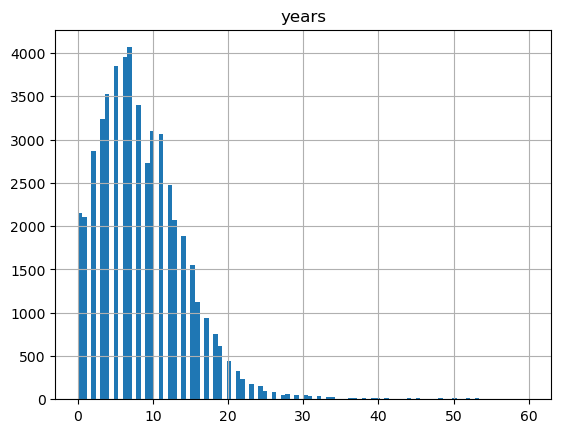

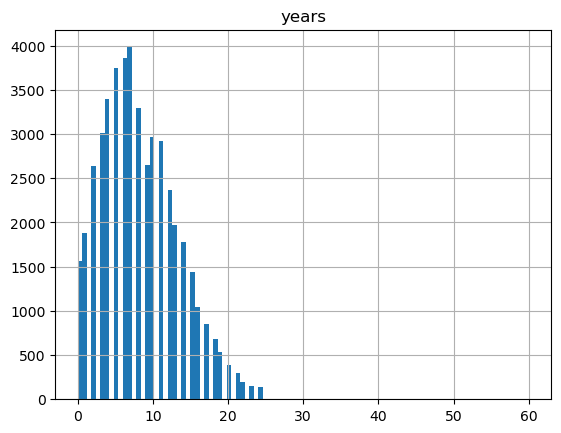

In [63]:
df.hist('years', bins=100, range=(0, 60))
plt.show()
df_good.hist('years', bins=100, range=(0, 60))
plt.show()

En esta columna no hay prácticamente ninguna diferencia entre los histogramas, ya que solo eliminamos los valores superiores a 24 años. Como ya habíamos mencionado anteriormente, se observa que la mayor cantidad de publicaciones corresponden a autos entre 4 y 8 años. Veámoslo más claramante acercándonos a esa zona:

array([[<AxesSubplot:title={'center':'years'}>]], dtype=object)

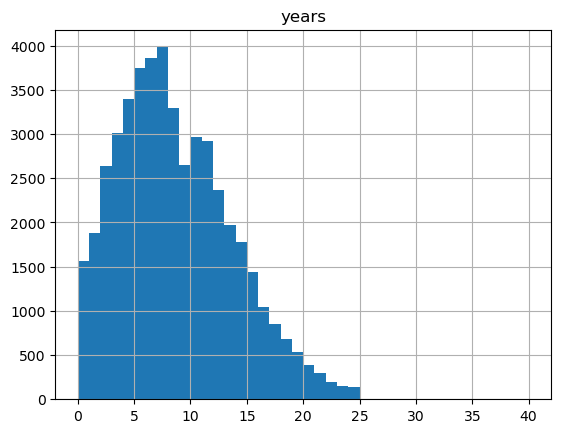

In [64]:
df_good.hist('years', bins=40, range=(0, 40))

Comparemos ahora la columna odometer con y sin valores atípicos

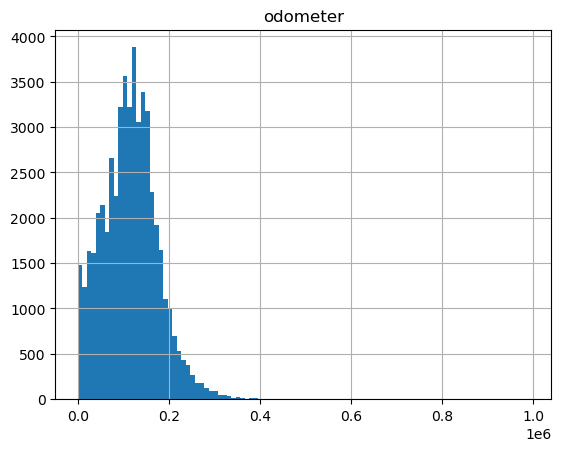

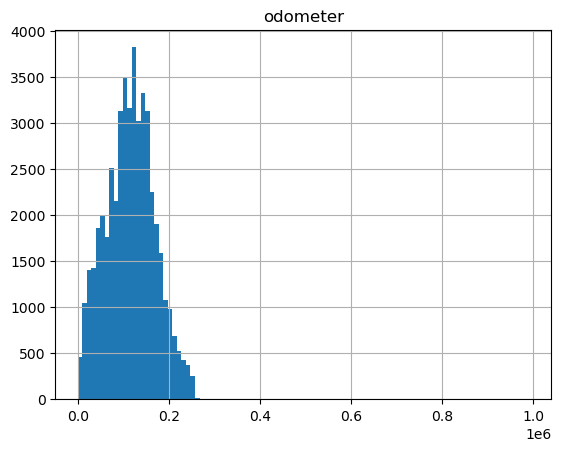

In [65]:
df.hist('odometer', bins=100, range=(0, 990000))
plt.show()
df_good.hist('odometer', bins=100, range=(0, 990000))
plt.show()

Podemos ver que la diferencia más visible se encuentra al comienzo del histograma, ya que se eliminaron los autos con menos de 1000 millas. También se eliminaron los autos con más de 230.000 millas. Veamos más de cerca esa zona:

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

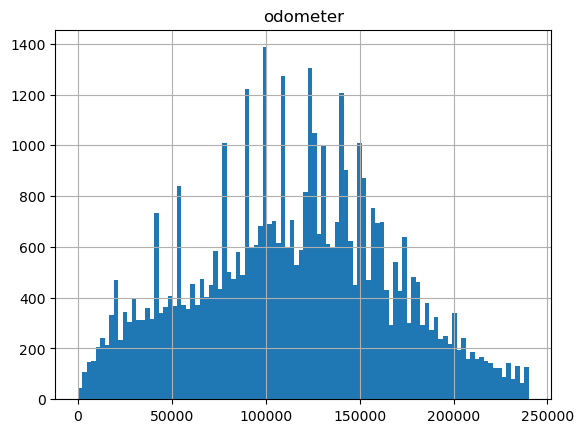

In [66]:
df_good.hist('odometer', bins=100, range=(0, 240000))

Podemos apreciar que la mayor cantidad de los autos publicados, tienen entre 100.000 y 150.000 millas. Podemos notar que la distribución ahora se ve más centrada y simétrica.

Comparemos ahora los valores en la columna cylinders

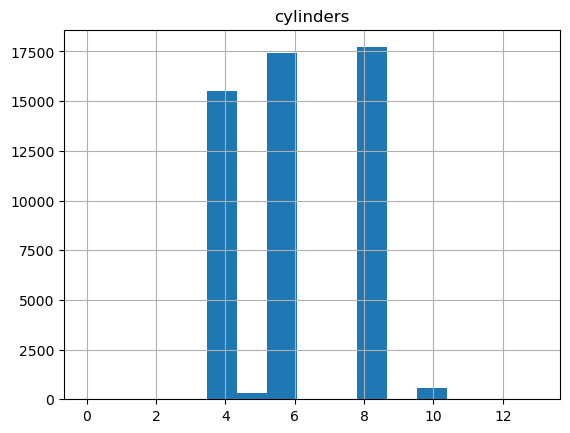

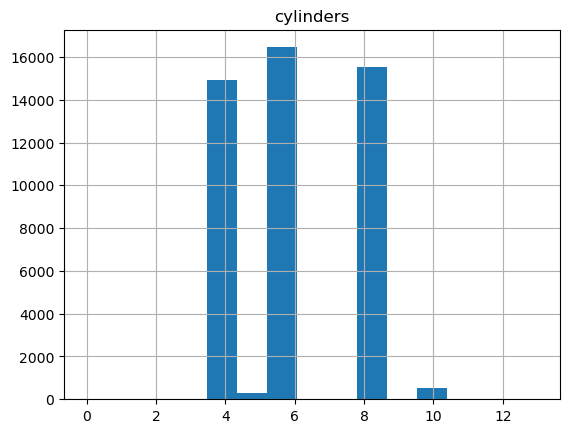

In [67]:
df.hist('cylinders', bins=15, range=(0, 13))
plt.show()
df_good.hist('cylinders', bins=15, range=(0, 13))
plt.show()

Vemos que el cambio aqué es muy sutil, ya que solo se eliminaron los autos con 3 y 12 cilindros, y era una cantidad muy pequeña

Respecto a la columna condition, no se realizó ningún cambio, pero veamos los histogramas para ver si los cambios en las otras categorías afectaron de alguna manera los valores

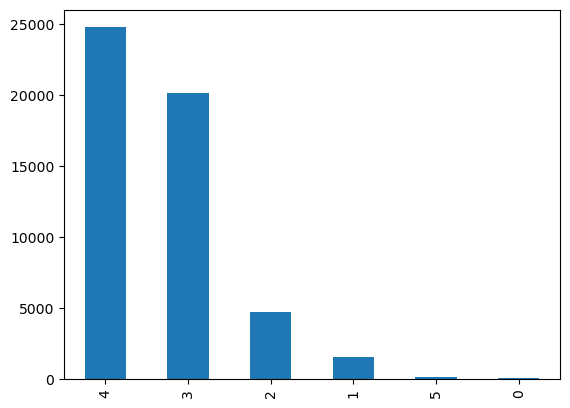

<AxesSubplot:>

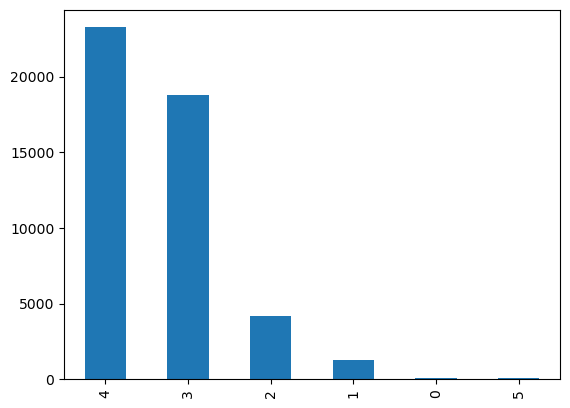

In [68]:
df['cat_condition'].value_counts().plot(kind='bar')
plt.show()
df_good['cat_condition'].value_counts().plot(kind='bar')

Podemos ver que, efectivamente, luego de la eliminación de valores atípicos, la condición 0 pasó a tener mayor cantidad de anuncios que la condición 5, intercambiando lugares entre si.

## Periodo de colocación de los anuncios

Revisemos ahora cuántos días los anuncios fueron mostrados, esto viendo la información de la columna `days_listed`. Vamos a calcular primero la media y la mediana usando el método describe

In [69]:
df_good['days_listed'].describe()

count    47752.000000
mean        39.540606
std         28.216336
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Podemos ver que la media del tiempo publicado es de 39.58 días, mientras que la mediana es de 33. El valor mínimo en la columna es 0, por lo que fueron anuncios que no duraron nisiqioera un día. En el otro extremo, tenemos anuncios que superaron los 200 dias de publicación, ¡con un máximo de 271 días!.

Vamos a revisar una muestra de ambos extremos:

In [70]:
df_good.sort_values('days_listed').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
39304,21100,2017,chevrolet camaro lt coupe 2d,good,6,gas,24510.0,other,coupe,red,No,2019-03-23,0,2,12255.000000,3
36265,24500,2018,chevrolet silverado,excellent,8,gas,30000.0,automatic,pickup,silver,Yes,2019-01-21,0,1,30000.000000,4
1247,14995,2008,chevrolet silverado 1500,excellent,8,gas,93300.0,automatic,truck,grey,Yes,2018-05-15,0,10,9330.000000,4
1983,14000,1999,ford f250,excellent,8,diesel,137500.0,automatic,truck,red,Yes,2018-09-27,0,19,7236.842105,4
41940,1800,2002,honda civic,good,4,gas,238155.0,automatic,sedan,silver,No,2018-09-28,0,16,14884.687500,3
2883,4000,2004,ram 1500,excellent,8,gas,250000.0,automatic,truck,brown,Yes,2018-08-13,0,14,17857.142857,4
48843,12000,2015,toyota rav4,excellent,4,gas,116000.0,automatic,hatchback,blue,Yes,2018-08-19,0,3,38666.666667,4
17339,7800,2009,gmc sierra,excellent,6,gas,142000.0,automatic,truck,red,No,2018-07-05,0,9,15777.777778,4
7036,5900,2007,jeep grand cherokee laredo,excellent,6,gas,142000.0,automatic,SUV,grey,Yes,2018-07-21,0,11,12909.090909,4
33873,6995,2009,gmc acadia,good,6,gas,177676.0,automatic,SUV,custom,No,2018-09-16,0,9,19741.777778,3


El patron que podemos ver en esta muestra, es que los autos cuyos anuncios duraron menos tiempo tenían muy poco kilometraje o su precio era muy bajo. En los que no se cumplia esta condición, eran autos para trabajo (camionetas tipo pick up o van), por lo que podemos asumir que es un modelo de auto muy buscado

In [71]:
df_good.sort_values('days_listed').tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
11698,21995,2019,chevrolet impala,like new,6,gas,14151.5,automatic,sedan,black,No,2019-02-24,236,0,14151.500000,2
19763,31995,2015,jeep wrangler unlimited,excellent,6,gas,78285.5,automatic,wagon,Not avaliable,Yes,2018-11-16,240,3,26095.166667,4
24527,5995,2007,toyota rav4,good,4,gas,106000.0,automatic,SUV,custom,Yes,2018-06-29,243,11,9636.363636,3
3202,5995,2009,toyota prius,excellent,4,gas,130000.0,automatic,hatchback,blue,No,2018-10-17,244,9,14444.444444,4
46583,11500,2017,ford fusion,excellent,4,gas,65000.0,automatic,sedan,red,No,2019-03-06,252,2,32500.000000,4
7875,8980,2013,nissan altima,excellent,6,gas,101611.0,automatic,coupe,blue,No,2019-02-02,256,6,16935.166667,4
51,3800,2012,ford focus,good,4,gas,130323.0,automatic,sedan,black,No,2018-11-29,261,6,21720.500000,3
2224,5995,2004,ford f-250,good,8,gas,103000.0,automatic,truck,red,Yes,2019-01-24,263,15,6866.666667,3
28756,5500,2011,nissan versa,excellent,4,gas,96000.0,automatic,hatchback,blue,No,2019-01-08,267,8,12000.000000,4
4360,5200,2011,chevrolet impala,like new,6,gas,122000.0,automatic,sedan,Not avaliable,No,2018-05-24,271,7,17428.571429,2


En el otro extremo, vemos que los autos que más duraron publicados, son en su mayoría de uso persinal (tipo sedan). Veamos un histograma para apreciar la distribución según los días publicados

<AxesSubplot:>

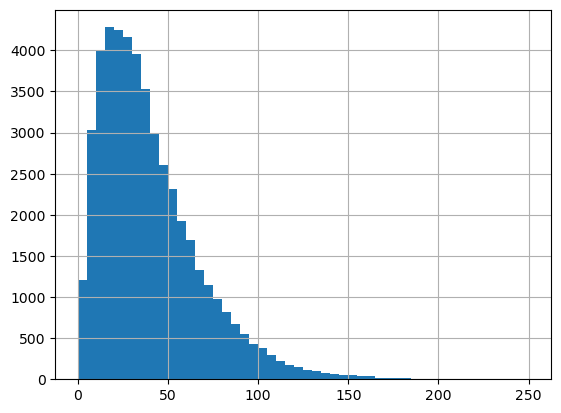

In [72]:
df_good['days_listed'].hist(bins=50, range=(0, 250))

Al ver el histograma, pareciera que son más los anuncios que duraron muy poco que los que duraron muchos días. Usemos un diagrama de caja para determinar cuánto es muy poco y cuánto es mucho tiempo de publicación

First quartile: 19.0
Third quartile: 53.0
IQR: 34.0
Límite inferior: -32.0
Límite superior: 104.0


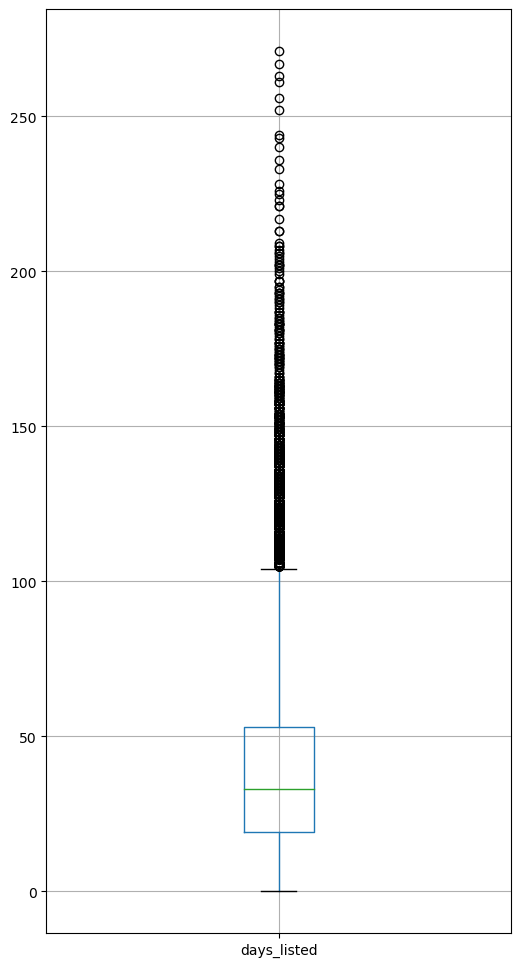

In [73]:
df_good.boxplot(column='days_listed', figsize=(6, 12))
Q1 = df_good['days_listed'].quantile(0.25)
Q3 = df_good['days_listed'].quantile(0.75)
IQR = Q3 - Q1
print("First quartile:", Q1)
print("Third quartile:", Q3)
print("IQR:", IQR)
print("Límite inferior:", Q1 - 1.5 * IQR)
print("Límite superior:", Q3 + 1.5 * IQR)

 Con este resultado, podemos considerar anuncios de poca duración a aquellos que duraron menos de 19 días y mucha duración más de 60 días. Este límite superior lo consideramos al ser un valor cercano a Q3

In [74]:
df_few_days = df_good.query('days_listed <= 19')
print(df_few_days['days_listed'].value_counts())
#print(df_few_days['days_listed'].count())
df_few_days.describe()

18    894
19    869
16    853
17    843
13    841
14    838
15    822
12    812
11    779
10    733
8     679
9     674
7     645
6     560
5     471
4     396
3     361
2     237
1     166
0      48
Name: days_listed, dtype: int64


,price,model_year,cylinders,odometer,days_listed,years,mean_mille,cat_condition
count,12521.000000,12521.000000,12521.000000,12521.000000,12521.000000,12521.000000,12521.000000,12521.000000
mean,11370.358518,2010.133376,6.055826,115453.766991,11.680776,8.167559,17936.032634,3.328009
std,7987.397481,5.060712,1.662545,53728.545729,4.936425,5.076826,11483.278425,0.782183
min,1.000000,1994.000000,4.000000,1003.000000,0.000000,0.000000,146.071429,0.000000
25%,5000.000000,2007.000000,4.000000,78000.000000,8.000000,4.000000,11188.571429,3.000000
50%,8995.000000,2011.000000,6.000000,116806.000000,12.000000,7.000000,15333.333333,3.000000
75%,15995.000000,2014.000000,8.000000,152500.000000,16.000000,12.000000,20974.111111,4.000000
max,35000.000000,2019.000000,10.000000,258000.000000,19.000000,24.000000,157000.000000,5.000000


In [75]:
df_lot_days = df_good.query('days_listed >= 60')
print(df_lot_days['days_listed'].value_counts())
#print(df_lot_days['days_listed'].count())
df_lot_days.describe()

62     344
60     342
61     341
63     334
64     329
      ... 
240      1
209      1
188      1
192      1
186      1
Name: days_listed, Length: 166, dtype: int64


,price,model_year,cylinders,odometer,days_listed,years,mean_mille,cat_condition
count,9510.000000,9510.00000,9510.000000,9510.000000,9510.000000,9510.000000,9510.000000,9510.000000
mean,11413.858360,2010.16225,6.064879,115587.407781,84.318717,8.154679,17892.905694,3.339642
std,7932.326254,4.97095,1.661962,53097.440987,24.189373,4.985134,11373.590533,0.769116
min,1.000000,1994.00000,4.000000,1700.000000,60.000000,0.000000,159.375000,0.000000
25%,5000.000000,2007.00000,4.000000,78285.500000,67.000000,4.000000,11188.571429,3.000000
50%,9000.000000,2011.00000,6.000000,117000.000000,77.000000,7.000000,15356.321429,3.000000
75%,15995.000000,2014.00000,8.000000,151584.750000,94.000000,11.000000,20878.142857,4.000000
max,35000.000000,2019.00000,10.000000,258000.000000,271.000000,24.000000,164409.000000,5.000000


Gracias a la segmentación de datos, podemos ver que son más los anuncios con una duración mayor a 60 días que los que duran menos de 10 días. Curiosamente, vemos que los valores medios, medianos, mínimos y máximos de todas las variables de interés son casi idénticos, por lo que no se aprecia algún patrón que haga la diferencia en el tiempo que dura publicado un anuncio. Existe la posibilidad de que los que duran poco, sean anuncios que se dan de baja sin haber vendido el auto, y que los que duran un tiempo extremadamente largo sean autos que, después de vendidos, no se hayan retirado del portal. Lamentablemente, con la información que tenemos, no podemos dar una respuesta a esa hipótesis.

Según el diagrama de caja, podemos decir que los anuncios cuya duración supera los 100 días son los que se salen del rango normal, y pueden definirse como un valor atípico. Sin embargo, como indicamos anteriormente, al no haber encontrado un patrón, no realizaremos ningún cambio en esta columna.

## Precio promedio por cada tipo de vehículo

Analicemos ahora el precio promedio para cada tipo de vehículo en todos los anuncios.

In [76]:
df_good.groupby('type')['price'].mean()

type
SUV            10582.733714
bus            17445.913043
convertible    12831.079545
coupe          13616.968625
hatchback       6839.647059
mini-van        8095.235138
offroad        14415.752747
other          10541.278970
pickup         15267.562600
sedan           6975.927155
truck          15383.734429
van            10614.862237
wagon           9100.721579
Name: price, dtype: float64

Tracemos un gráfico que nos muestre la relación entre la cantidad de anuncios por cada tipo de vehículo. 

<AxesSubplot:>

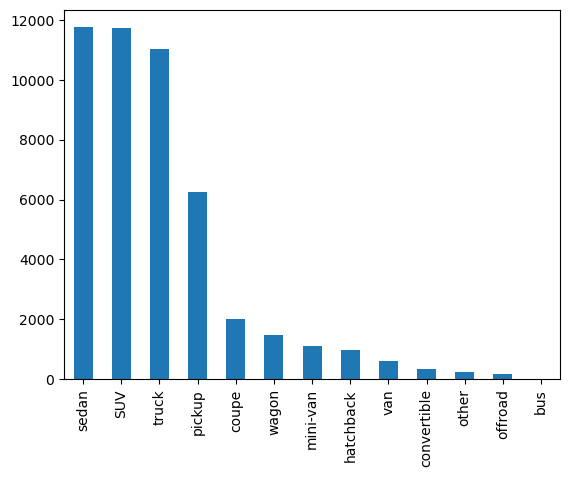

In [77]:
df_good['type'].value_counts().plot(kind='bar')

Podemos ver que los dos tipos con un mayor número de anuncios son vehículos tipo sedan (con un precio promedio por anuncio de 6975.92) y SUV (con un precio promedio por anuncio de 10582.73), seguidos de cerca por truck (con un precio promedio por anuncio de 15383.73)

## Factores de precio

Respondamos ahora la preguta ¿Qué factores impactan más sobre el precio?. Para ello, revisemos los anuncios de las categorías sedán y SUV a fin de determinar si el precio depende de la edad, millaje, condición, tipo de transmisión y color.

Analicemos primero las variables categóricas (transmisión y color). para ello, utilizaremos gráficos de caja y bigotes contaremos los valores por variale para asegurarnos de que al menos tengan 50 anuncios cada categoría y así poder tomarlos como válidos para el análisis.

In [78]:
# df_good.boxplot(column='price', by='type', figsize=(10, 6))
df_good['type'].value_counts()

sedan          11751
SUV            11728
truck          11014
pickup          6262
coupe           2008
wagon           1469
mini-van        1127
hatchback        986
van              617
convertible      352
other            233
offroad          182
bus               23
Name: type, dtype: int64

Dejaremos por fuera la los vehículos de tipo bus, por tener menos de 50 anuncios

In [79]:
df_good = df_good.query('type != "bus"')
df_good['type'].value_counts()

sedan          11751
SUV            11728
truck          11014
pickup          6262
coupe           2008
wagon           1469
mini-van        1127
hatchback        986
van              617
convertible      352
other            233
offroad          182
Name: type, dtype: int64

<AxesSubplot:xlabel='transmission'>

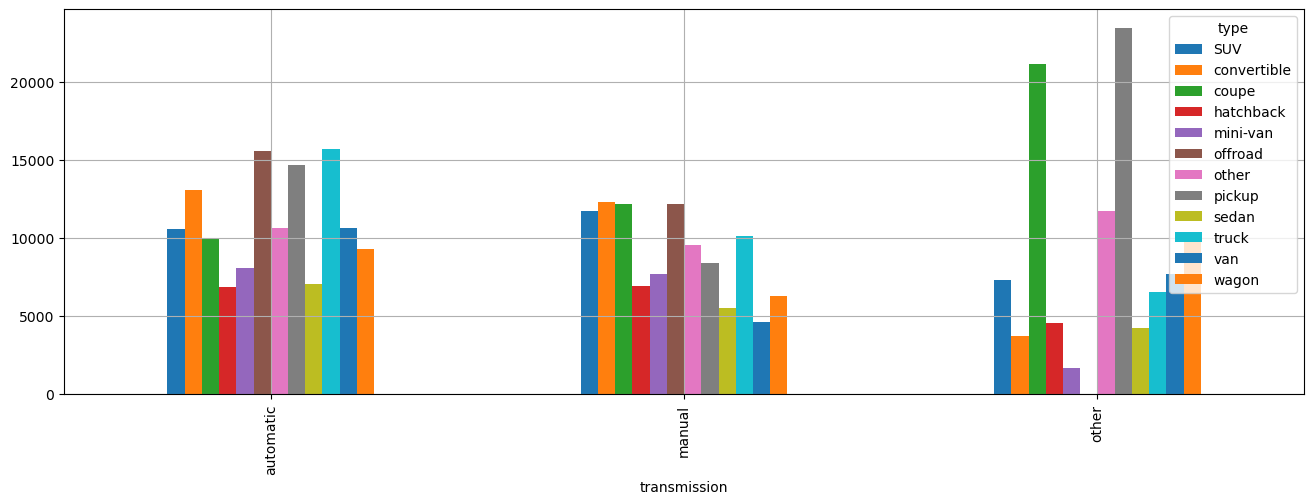

In [80]:
(df_good
     .pivot_table(index='transmission', columns='type', values='price')
     .plot(grid=True, figsize=(16, 5), kind='bar')
)

Podemos ver en el tipo de transmisión, que los autos automáticos tienen un mayor precio que los manuales. Vemos también la categoría others con algunos precios incluso más altos que los de los autos automáticos. Hagamos una tabla filtrada con los dos tipos de auto más populares (sedan y SUV) y revisémoslo con más detalle usando otro tipo de gráfico

In [81]:
df_suv = df_good.query('type == "SUV"')
df_sedan = df_good.query('type == "sedan"')

                count          mean          std    min     25%      50%  \
transmission                                                               
automatic     11116.0  10580.700342  7216.350036    1.0  5000.0   8882.5   
manual          456.0  11747.265351  6648.803628  500.0  6475.0  10995.0   
other           156.0   7323.608974  7708.089507    1.0     1.0   5275.0   

                  75%      max  
transmission                    
automatic     14695.5  35000.0  
manual        16500.0  31500.0  
other         12900.0  28999.0  


automatic    0.947817
manual       0.038881
other        0.013302
Name: transmission, dtype: float64

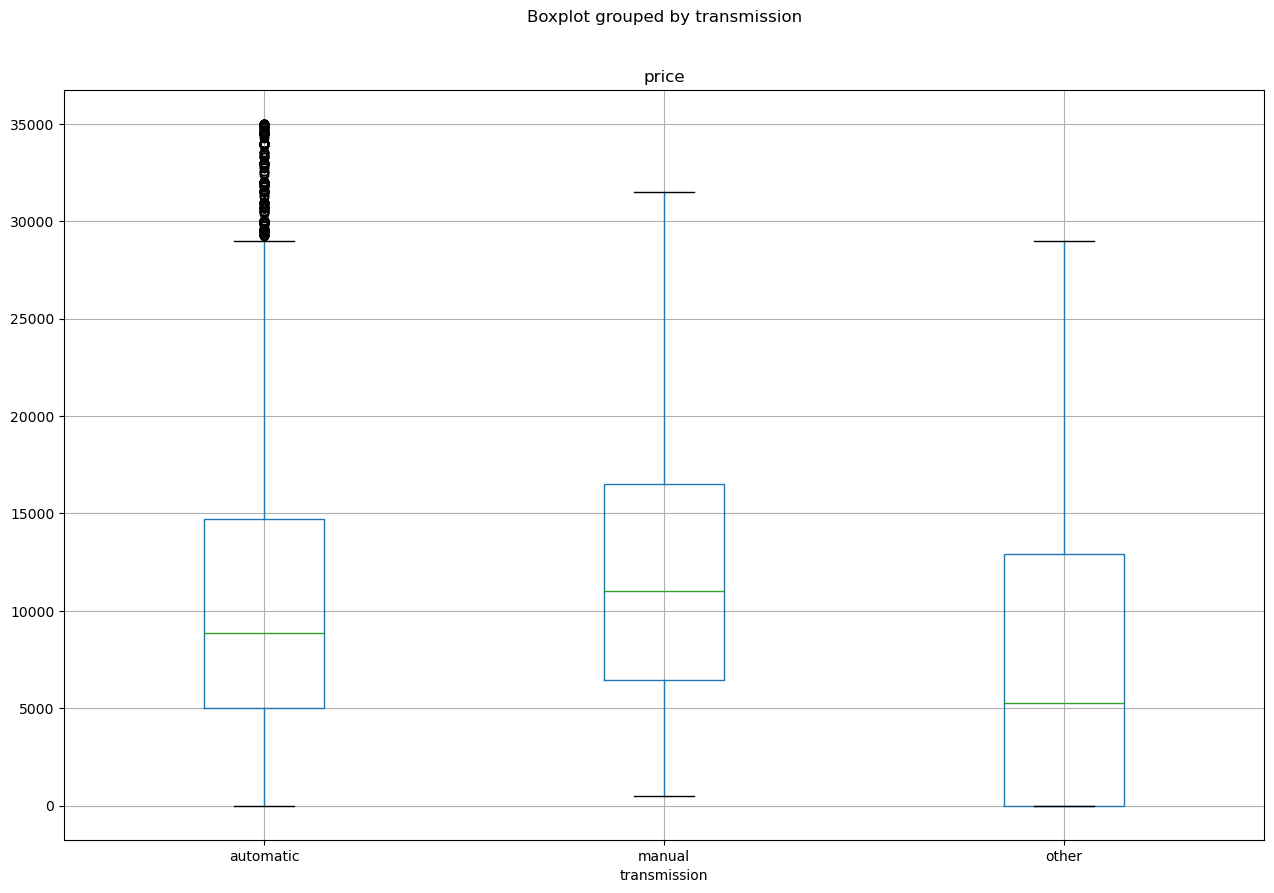

In [82]:
df_suv.boxplot(column='price', by='transmission', figsize=(15, 10))
print(df_suv.groupby('transmission')['price'].describe())
df_suv['transmission'].value_counts(normalize=True)

                count         mean          std  min     25%     50%     75%  \
transmission                                                                   
automatic     11060.0  7081.922423  4224.106370  1.0  3995.0  6000.0  9450.0   
manual          563.0  5515.833037  3840.863833  1.0  2950.0  4500.0  6995.0   
other           128.0  4239.406250  4835.881352  1.0     1.0  3650.0  6637.5   

                  max  
transmission           
automatic     32999.0  
manual        25000.0  
other         20700.0  


automatic    0.941196
manual       0.047911
other        0.010893
Name: transmission, dtype: float64

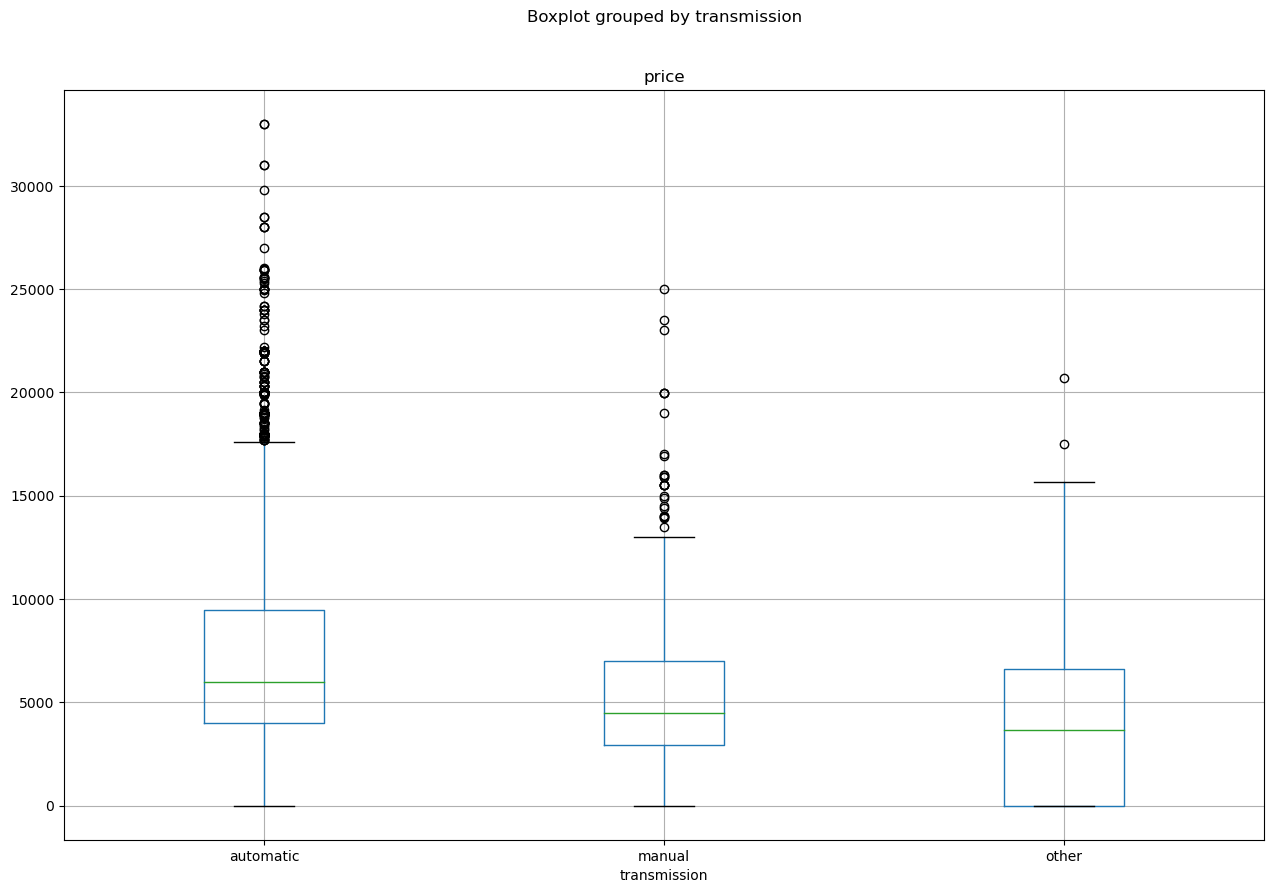

In [83]:
df_sedan.boxplot(column='price', by='transmission', figsize=(15, 10))
print(df_sedan.groupby('transmission')['price'].describe())
df_sedan['transmission'].value_counts(normalize=True)

Lo primero que podemos ver que en las categorías SUV y sedán, la cantidad de autos del tipo de transmisión automática es muy superior a los autos de transmisión manual, un 94% del total en ambos casos.

Respecto al precio, vemos que en la categoría SUV, los autos automáticos tienen una media de 10580.70 y una mediana de 8882.5, mientras que los de transmisión manual tienen una media de 11747.26 y una mediana de 10995.0. Por lo tanto, en esta categoría, los autos manuales son un poco más costosos que los automáticos.

En la categoría sedán, los autos automáticos tienen una media de 7081.92 y una mediana de 9450.0, mientras que los de transmisión manual tienen una media de 5515.83 y una mediana de 6995.0. Por lo tanto, en esta categoría, los autos automáticos son un poco más costosos que los manuales.

Podemos ver que los autos con el tipo de transmiaión other son muy pocos, apenas el 1% aproximadamamente del total de cada categoría. Sin embargo, veámoslo más a fondo para determinar si podemos hacer algo con ese valor

In [84]:
df_trans = df.query('transmission == "other"')
df_trans

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years,mean_mille,cat_condition
55,19700,2017,chevrolet camaro lt coupe 2d,good,6,gas,35807.0,other,coupe,Not avaliable,No,2018-05-16,99,1,35807.000000,3
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,Not avaliable,Yes,2018-10-13,36,0,27493.000000,3
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,Yes,2019-02-28,30,0,10899.000000,3
88,26000,2017,ford mustang gt coupe 2d,good,8,gas,41000.0,other,coupe,yellow,No,2018-11-26,31,1,41000.000000,3
89,18800,2015,chevrolet camaro lt coupe 2d,good,6,gas,33926.0,other,coupe,grey,No,2019-01-16,152,4,8481.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51184,23800,2019,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,Yes,2019-01-30,42,0,10899.000000,3
51186,24100,2013,chevrolet silverado 1500 crew,good,8,gas,55315.0,other,pickup,white,Yes,2018-11-27,15,5,11063.000000,3
51198,21400,2013,ford f150 supercrew cab xlt,good,6,gas,89987.0,other,pickup,black,Yes,2019-01-23,34,6,14997.833333,3
51441,25999,2014,toyota tacoma,good,6,gas,88307.0,other,truck,white,Yes,2018-07-07,56,4,22076.750000,3


Podemos ver que los modelos de la muestra son autos cuya transmisión principalmente es automática, pero también tiene versiones manuales. Lamentablemente, con la información que tenemos, no podemos determinar de forma precisa el tipo correcto de transmisión, pero revisaremos los valores a ver si son suficientes para dejarlos en el estudio.

In [85]:
df_good.groupby('type')['transmission'].value_counts()

type         transmission
SUV          automatic       11116
             manual            456
             other             156
convertible  automatic         281
             manual             67
             other               4
coupe        automatic        1036
             other             585
             manual            387
hatchback    automatic         842
             manual            123
             other              21
mini-van     automatic        1122
             manual              4
             other               1
offroad      automatic         120
             manual             62
other        automatic         211
             manual             20
             other               2
pickup       automatic        5364
             other             615
             manual            283
sedan        automatic       11060
             manual            563
             other             128
truck        automatic       10453
             manual          

In [86]:
df_good['transmission'].value_counts(normalize=True)

automatic    0.912799
manual       0.050787
other        0.036414
Name: transmission, dtype: float64

Vemos que en algunas categorías la cantidad de autos con transmisión other es menor a 30, pero en otras es bastante alto. En vista de que son un porcentaje bajo del DataFrame (apenas el 3.6%), dejaremos los valores tal y como están.

Ahora, veamos la relación del precio con el color. Veamos primero la cantidad de anuncios por tipo y olor

In [87]:
print(df_suv['paint_color'].value_counts())
print(df_sedan['paint_color'].value_counts())

Not avaliable    2109
black            2066
white            1853
silver           1512
grey             1136
blue              988
red               863
green             397
brown             347
custom            296
orange             80
yellow             43
purple             38
Name: paint_color, dtype: int64
Not avaliable    2122
silver           1999
black            1709
grey             1565
white            1460
blue             1197
red               907
custom            291
brown             251
green             197
purple             23
yellow             21
orange              9
Name: paint_color, dtype: int64


En el tipo SUV eliminaremos los colores purple y yellow, mientras que en el tipo sedan eliminaremos los colores purple, yellow y orange

In [88]:
df_suv = df_suv.query('paint_color != "purple" and paint_color != "yellow"')

In [89]:
df_sedan = df_sedan.query('paint_color != "purple" and paint_color != "yellow" and paint_color != "orange"')

                count          mean          std    min     25%      50%  \
paint_color                                                                
Not avaliable  2109.0  10623.384068  7304.013800    1.0  5250.0   8800.0   
black          2066.0  12159.123427  7860.689956    1.0  5995.0  10994.0   
blue            988.0   8636.945344  5936.243472    1.0  4500.0   6995.0   
brown           347.0   8793.400576  5988.306002  500.0  4100.0   7488.0   
custom          296.0   9367.077703  6722.157962    1.0  4990.0   7999.0   
green           397.0   8257.937028  5734.274790    1.0  3500.0   6399.0   
grey           1136.0  10532.941901  7219.363552    1.0  4995.0   8658.5   
orange           80.0  14941.800000  6613.248893  900.0  9716.0  16900.0   
red             863.0   9726.040556  6730.737144    1.0  4500.0   7900.0   
silver         1512.0   9988.231481  6522.468609    1.0  5000.0   8450.0   
white          1853.0  11566.165677  7668.102462    1.0  5900.0   9900.0   

           

Not avaliable    0.181077
black            0.177385
white            0.159097
silver           0.129819
grey             0.097536
blue             0.084829
red              0.074096
green            0.034086
brown            0.029793
custom           0.025414
orange           0.006869
Name: paint_color, dtype: float64

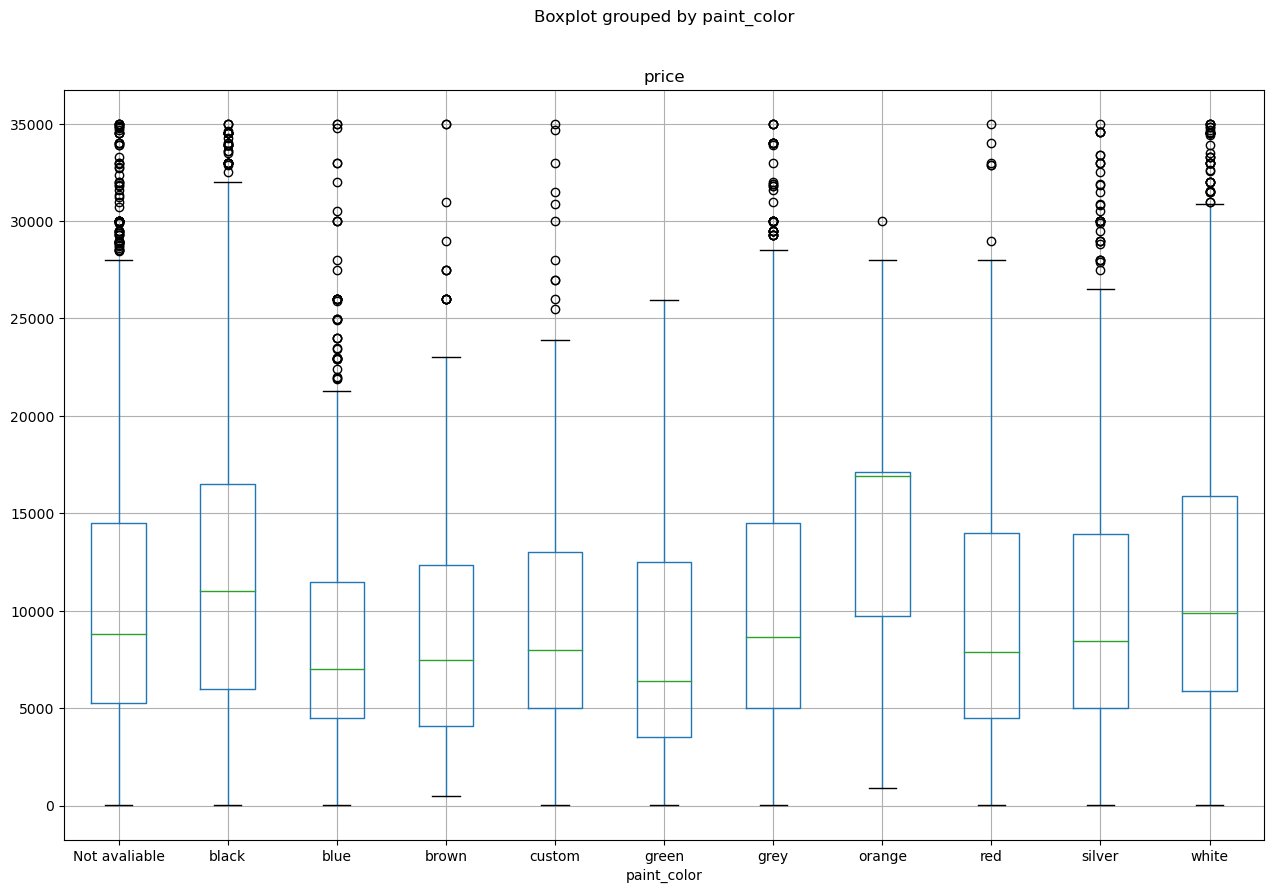

In [90]:
df_suv.boxplot(column='price', by='paint_color', figsize=(15, 10))
print(df_suv.groupby('paint_color')['price'].describe())
df_suv['paint_color'].value_counts(normalize=True)

                count         mean          std    min     25%     50%  \
paint_color                                                              
Not avaliable  2122.0  6949.817154  4267.770025    1.0  3995.0  5995.0   
black          1709.0  7530.166764  4345.142201    1.0  4295.0  6900.0   
blue           1197.0  6536.830409  4153.836090    1.0  3850.0  5699.0   
brown           251.0  5264.446215  3303.872747  600.0  2995.0  4498.0   
custom          291.0  6396.443299  4553.339649    1.0  3450.0  5495.0   
green           197.0  4788.898477  3267.324829    1.0  2500.0  3900.0   
grey           1565.0  7053.476677  3880.948213    1.0  4399.0  6299.0   
red             907.0  6977.822492  4322.282662    1.0  3995.0  5995.0   
silver         1999.0  6902.708854  4140.341326   12.0  3900.0  5995.0   
white          1460.0  7462.515753  4472.046219    1.0  4498.5  6600.0   

                  75%      max  
paint_color                     
Not avaliable  9250.0  32999.0  
black       

Not avaliable    0.181399
silver           0.170884
black            0.146093
grey             0.133784
white            0.124808
blue             0.102325
red              0.077535
custom           0.024876
brown            0.021457
green            0.016840
Name: paint_color, dtype: float64

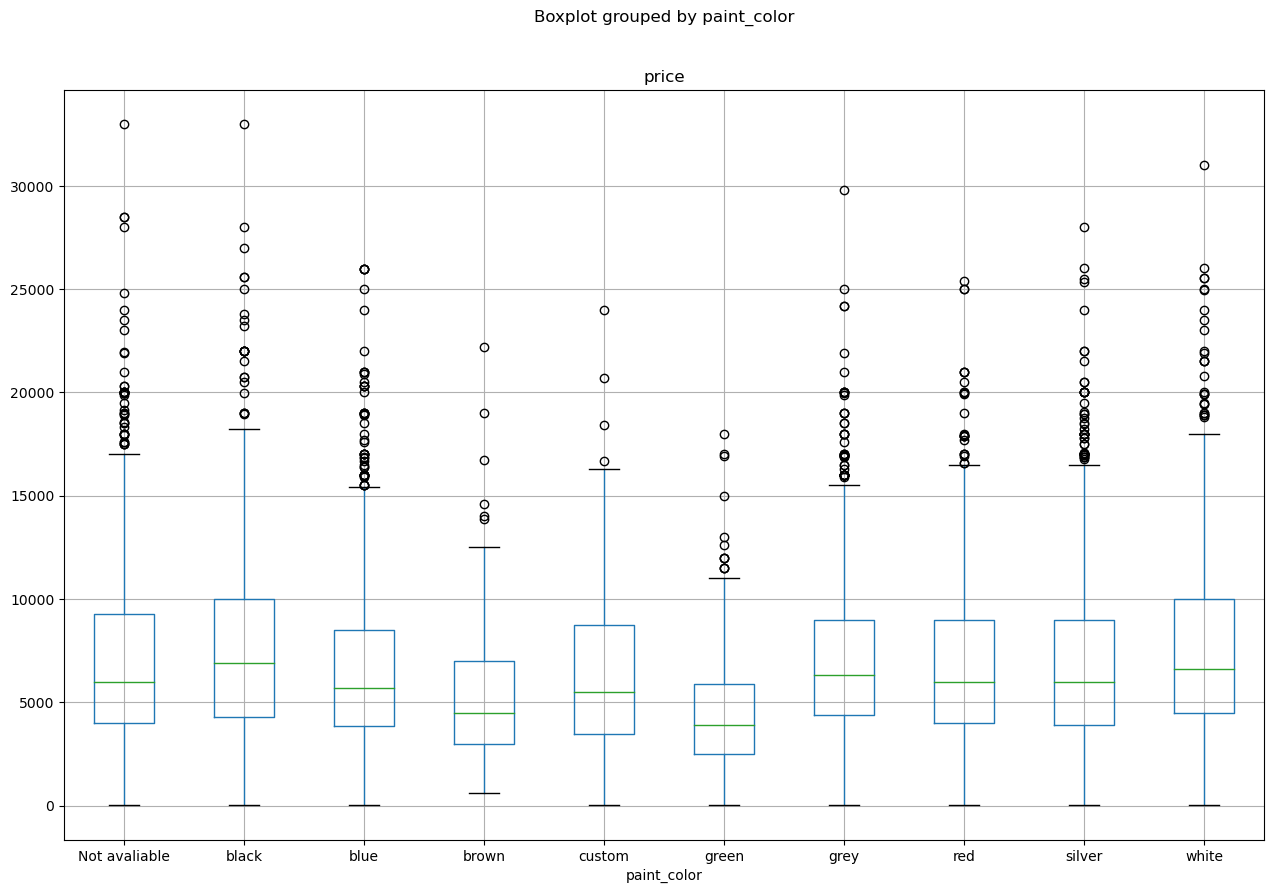

In [91]:
df_sedan.boxplot(column='price', by='paint_color', figsize=(15, 10))
print(df_sedan.groupby('paint_color')['price'].describe())
df_sedan['paint_color'].value_counts(normalize=True)

En la categoría SUV, los autos de mayor valor son los color orange, con una media de 14941.80 y una mediana de 16900.0, pero representan menos del 1% del total de los autos publicados, lo que podría dar a pensar que son carros poco comunes o exoticos, por decirlo de alguna forma, lo que puede hacer que se incremente su valor. Le siguen los autos negros con una media 12159.12 de y una mediana de 10994.0. Estos si representan una porción importante del total, 17.7%.

En la categoría sedan, los autos de mayor valor son los color black, con una media de 7530.16 y una mediana de 6900.0. representan el 14.6% del total de los autos publicados. Le siguen muy de cerca los autos white con una media 7462.51 de y una mediana de 6600.0, y representan el 12.4%.

Veamos con un diagrama de dispersión la relación entre precio y categoría.

<AxesSubplot:xlabel='cat_condition', ylabel='price'>

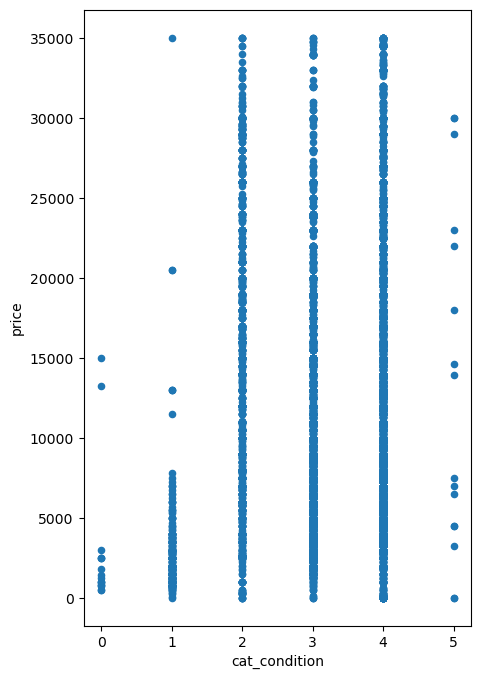

In [92]:
df_suv.plot(x='cat_condition', y='price', kind='scatter', figsize=(5, 8))

<AxesSubplot:xlabel='cat_condition', ylabel='price'>

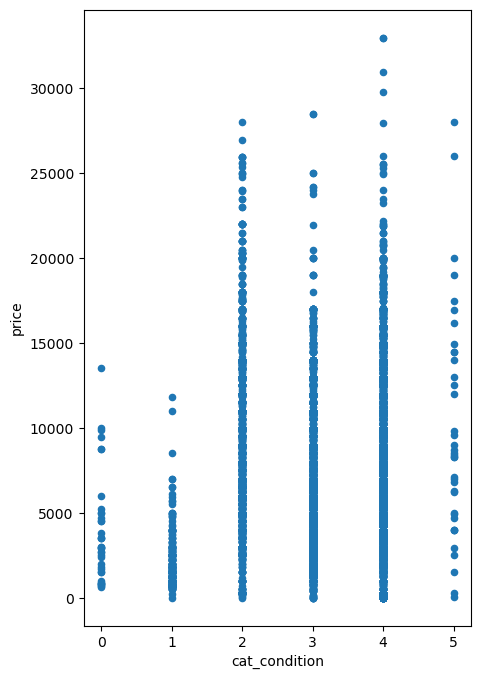

In [93]:
df_sedan.plot(x='cat_condition', y='price', kind='scatter', figsize=(5, 8))

Vemos que, en general, los autos tipo SUV tienen un mayor valor que los de tipo sedan, con una distribución bastante uniforme de precios en todo el rango (desde 0 a 35000). Los autos tipo sedan se encuentran con una mayor distribución en en rango entre los 0 y 22500 aproximadamente. Los cantidad de autos sobre este precio es menor y la distribución más dispersa

Veamos la relación precio/kilometraje

<AxesSubplot:xlabel='odometer', ylabel='price'>

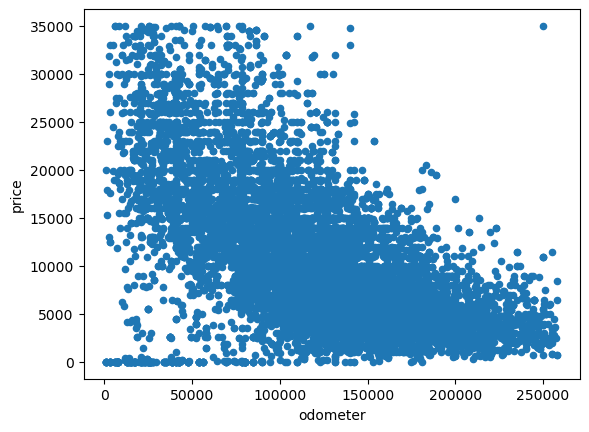

In [94]:
df_suv.plot(x='odometer', y='price', kind='scatter')

<AxesSubplot:xlabel='odometer', ylabel='price'>

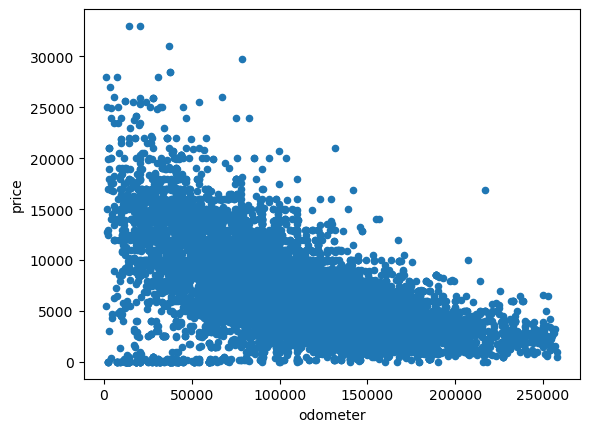

In [95]:
df_sedan.plot(x='odometer', y='price', kind='scatter')

Podemos una relacion clara entre millaje y precio en ambas categorías, la cual se traduce en que mientras mayor es el millaje, menor es el precio

Veamos la relación del precio con el año del vehículo

<AxesSubplot:xlabel='years', ylabel='price'>

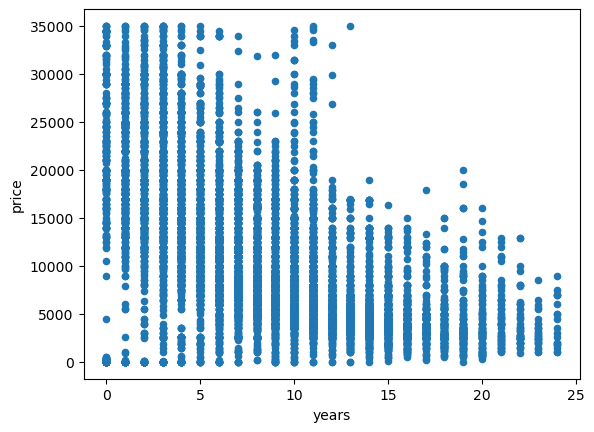

In [96]:
df_suv.plot(x='years', y='price', kind='scatter')

<AxesSubplot:xlabel='years', ylabel='price'>

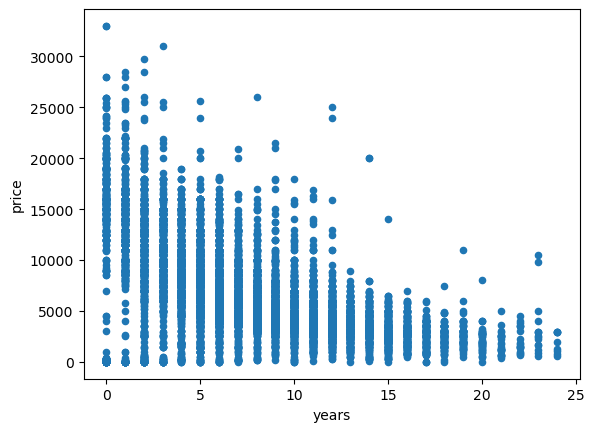

In [97]:
df_sedan.plot(x='years', y='price', kind='scatter')

En este caso, y en ambas categorías, podemos ver tun claro patrón que muestra como a medida que aumenta el año del auto, su precio disminuye. Podemos resumirlo como: a mayor cantidad de años, menor es el precio.

Comprobemos si existe alguna relación entre el precio y los días que dura la publicación

<AxesSubplot:xlabel='days_listed', ylabel='price'>

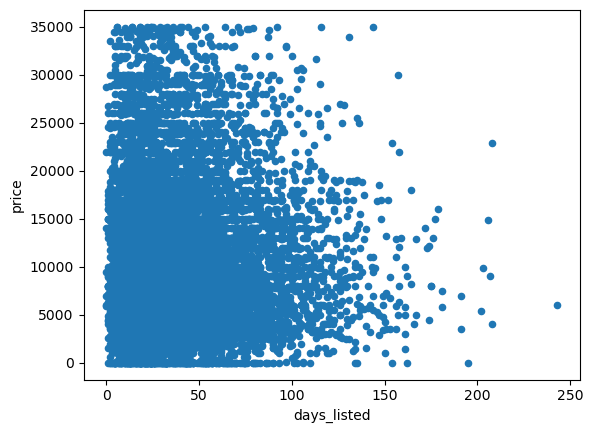

In [98]:
df_suv.plot(x='days_listed', y='price', kind='scatter')

<AxesSubplot:xlabel='days_listed', ylabel='price'>

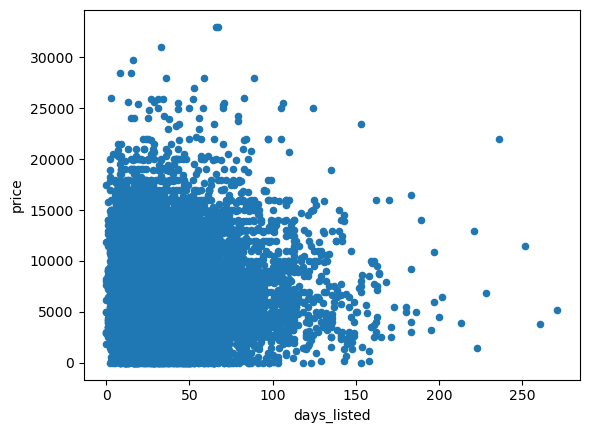

In [99]:
df_sedan.plot(x='days_listed', y='price', kind='scatter')

Curiosamente, vemos que, en la categoría SUV, los autos con precios superiores a los 20000 tiene una duración media ligeramente menor, pasando pocas publicaciones los 100 días, a diferencia de los autos con precios por debajo de este valor que en su mayoría llegan a los 100 días publicados.

En la categoría sedán, vemos que se repite el patrón, siendo los autos más económicos los que duran mas tiempo publicados. Esto puede deberse a que son autos que quizá no están en óptimas condiciones.

Por último, comparemos como se comporta la relación entre el precio y el millaje anual para las categorías de SUV y Sedan :)

<AxesSubplot:xlabel='mean_mille', ylabel='price'>

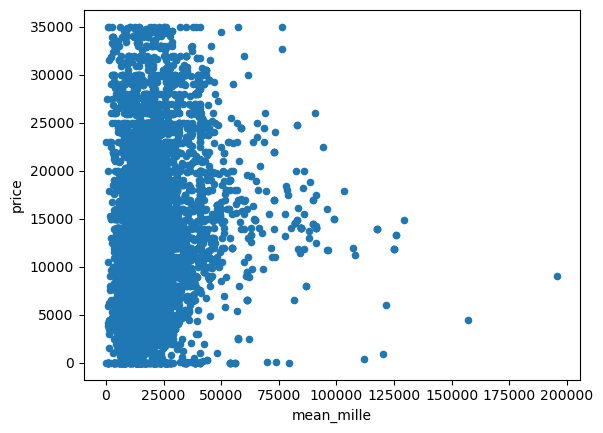

In [100]:
df_suv.plot(x='mean_mille', y='price', kind='scatter')

<AxesSubplot:xlabel='mean_mille', ylabel='price'>

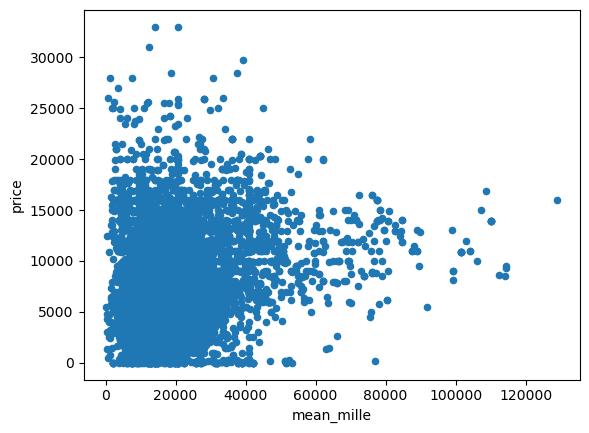

In [101]:
df_sedan.plot(x='mean_mille', y='price', kind='scatter')

Vemos que la mayoría de los autos tipo SUV tienen un millaje anual de 30.000 millas, y en ese rango los precios se distribuyen de forma uniforme en todo el rango (de 0 a 35.000). Los autos entre 50.000 y 100.000 millas anuales tienen precios entre los 10.000 y 25.000, y los que pasan ese millaje tienen precios inferiores a los 15.000.

Los autos tipo sedan, en su mayoría están en el rango entre o y 40.000 millas al año, con precios de 0 a 20.000. Los autos que superan las 40.000 millas anuales promedio, están en el ragngo de precio entre los 8.000 17.000.

Finalmente, y para tener una mejor visión del panorama total, hagamos una matriz de correlación con las variables que acabamos de ver por separado

                  price  model_year  cylinders  odometer  days_listed  \
price          1.000000    0.513482   0.312244 -0.477565    -0.002490   
model_year     0.513482    1.000000  -0.149259 -0.639130    -0.002320   
cylinders      0.312244   -0.149259   1.000000  0.117353     0.002186   
odometer      -0.477565   -0.639130   0.117353  1.000000     0.004795   
days_listed   -0.002490   -0.002320   0.002186  0.004795     1.000000   
years         -0.511445   -0.995811   0.148639  0.636560     0.003385   
mean_mille     0.231352    0.533256  -0.052218 -0.005853    -0.004708   
cat_condition  0.080070    0.141151  -0.026199 -0.094921     0.006087   

                  years  mean_mille  cat_condition  
price         -0.511445    0.231352       0.080070  
model_year    -0.995811    0.533256       0.141151  
cylinders      0.148639   -0.052218      -0.026199  
odometer       0.636560   -0.005853      -0.094921  
days_listed    0.003385   -0.004708       0.006087  
years          1.000000 

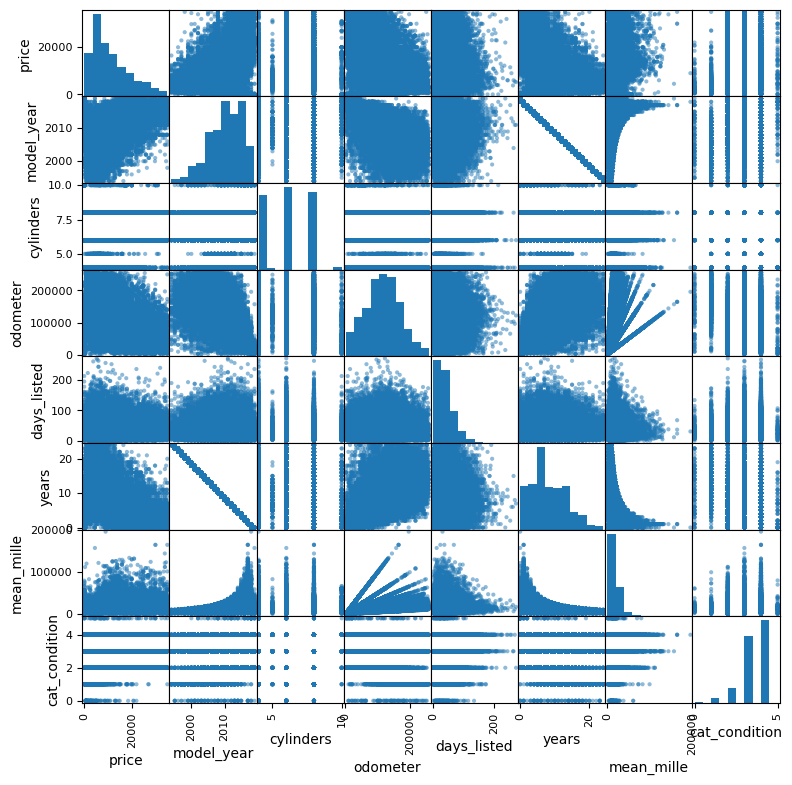

In [102]:
print(df_good.corr())
pd.plotting.scatter_matrix(df_good, figsize=(9, 9))
plt.show()

En esta matriz de podemos ver que las correlaciones más fuertes son entre model_year y odometer, model_year y price. La primera es inversamente proporcional, lo que quiere decir que mientras menor es el año, mayor es el kilometraje. Esto se puede ver también en la correlación entre years y odometer, que es prácticamente la misma, pero positiva, ya que mientras más años tiene el auto, mayor es el valor de odometer. La segunda correlación (model_year y price) es también positiva, ya que mientras más nuevo es el auto (mayor valor en la columna model year), mayor es el valor del mismo.

## Conclusión general

Para trabajar los valores ausentes, se tomó la decisión de sustituirlos por valores medios que si estaban disponibles para ese mismo modelo del auto en las otras filas del DataFrame. No se encontraron valores duplicados y los valores atípicos se eliminaron calculando los cuartiles y el rango intercuartílico para cada variable por medio de diagramas de caja. Finalmente, con un DataFrame más limpio y ordenado, se compararon las variables con diferentes técnicas como visualización por medio de histogramas y diagramas de dispersión, gracias a lo que pudimos llegar a las siguientes conclusiones

- Los autos automáticos son más caros que los autos manuales
- El color del auto no es determinante para establecer el precio
- No pudimos encontrar un patrón claro para determinar lo que causa la duración excesivamente larga de un anuncio, pero en la parte de la muestra que contiene los anuncios que tuvieron menor duración tenían precios y kilometrajes bajos, y también eran de autos tipo utilitario (camionetas para trabajo tipo pickup y van)

Podemos concluir que los factores que más influyen en el precio de un auto son los siguientes:

- Año y kilometraje: Esto pudimos confirmarlo en la matriz de correlación, en la que se observa como patrón que los autos con menos años tienen en promedio precios más altos que los autos más antiguos, y, por el lado del kilometraje, podemos ver un patrón mostrando que los autos con menor kilometraje promedio tienen un mayor precio que aquellos con mayor kilometraje promedio.

- Tipo de auto: tenemos que los autos con mayor cantidad de publicaciones son los de tipo SUV y sedan, siendo los primeros más costosos en promedio que los segundos.
    - Los autos tipo SUV son más costosos en promedio cuando su transmisión es manual, y los autos tipo sedan son más costosos cuando su tipo de transmisión es automática.

- Color: los autos más costosos son de color negro, seguidos por los autos color blancos. También pudimos ver autos color naranja como los más costosos del tipo SUV, pero estos representan una porción muy pequeña del total de anuncios, lo que nos hace pensar que son autos poco comunes y por ende cotizados por su rareza. 

Como conclución general, se sugiere establecer como campos obligatorios todos los contenidos en el DataFrame, incorporando listas desplegables para reducir el riesgo de error humano en el vaciado de la información. En cuanto a las variables categóricas, la lista desplegable solo debe contener las posibles opciones por categoría, mientras que en el caso de las variables cuantitativas, se sugiere hacer una lista desplegable con lo valores precisos para datos en los que no se manejan muchas variables, como por ejemplo para el año de fabricación y la cilindrada. Para estos últimos, podría incluso relacionarse la lista desplegable a la marca y modelo del auto, para que solo aparezcan como disponibles las opciones que correspondan a estos. Para los parametros con muchas variables, como el kilometraje, se suguiere una lista desplegable por rangos. ejemplo, de 0 a 1000, de 1000 a 2000, y así sucesivamente. El campo para el precio sería el único que se dejaría con opción para llenado manual.

Estos cambios en la página eliminaran muchos errores, lo que a su vez permitirá tener información más precisa y le dará más confiabilidad al sitio web, lo que se traducirá en una mejora de su reputación y mayor número de visitas.